In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel(r"D:\Harsh\Removed_stations.xlsx")

In [3]:
df

Station_name  From_Date   PM2_5    PM10     NO2     RH  \
0      Arya Nagar, Bahadurgarh 2019-02-01   98.55  156.89    47.7  81.79   
1      Arya Nagar, Bahadurgarh 2019-02-02   93.92  141.84   31.69   92.9   
2      Arya Nagar, Bahadurgarh 2019-02-03   71.62  150.17   29.18  94.31   
3      Arya Nagar, Bahadurgarh 2019-02-04   65.47  179.27   45.33  79.54   
4      Arya Nagar, Bahadurgarh 2019-02-05  169.06   393.6  103.21  67.89   
...                        ...        ...     ...     ...     ...    ...   
26268   Urban Estate-II, Hisar 2023-07-27   35.11   57.92    None   None   
26269   Urban Estate-II, Hisar 2023-07-28   21.49   35.46   25.53   None   
26270   Urban Estate-II, Hisar 2023-07-29   21.77   35.93   27.45   None   
26271   Urban Estate-II, Hisar 2023-07-30    None    None    None   None   
26272   Urban Estate-II, Hisar 2023-07-31    None    None    None   None   

         WS      WD  Latitude  Longitude  
0       2.6  226.99   28.6842    76.9329  
1      2.37  285.44   28.6842    76.9329  
2      1.91  273.56   28.6842    76.9329  
3      1.55  247.09   28.6842    76.9329  
4      2.02  104.34   28.6842    76.9329  
...     ...     ...       ...        ...  
26268  None    None   29.1447    75.7074  
26269  None    None   29.1447    75.7074  
26270  None    None   29.1447    75.7074  
26271  None    None   29.1447    75.7074  
26272  None    None   29.1447    75.7074  

[26273 rows x 10 columns]

# Cleaning

In [4]:
df.describe()

Latitude     Longitude
count  26272.000000  26272.000000
mean      29.154187     76.587112
std        0.708297      0.562666
min       28.056100     75.454200
25%       28.594450     76.125450
50%       29.229450     76.797550
75%       29.712825     76.983100
max       30.316400     77.331800

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26273 entries, 0 to 26272
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Station_name  26272 non-null  object        
 1   From_Date     26272 non-null  datetime64[ns]
 2   PM2_5         26272 non-null  object        
 3   PM10          26272 non-null  object        
 4   NO2           26272 non-null  object        
 5   RH            26272 non-null  object        
 6   WS            26272 non-null  object        
 7   WD            26272 non-null  object        
 8   Latitude      26272 non-null  float64       
 9   Longitude     26272 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Station_name    1
From_Date       1
PM2_5           1
PM10            1
NO2             1
RH              1
WS              1
WD              1
Latitude        1
Longitude       1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Station_name    0
From_Date       0
PM2_5           0
PM10            0
NO2             0
RH              0
WS              0
WD              0
Latitude        0
Longitude       0
dtype: int64

In [9]:
df.replace('None', np.nan, inplace=True)

In [10]:
df.isnull().sum()

Station_name       0
From_Date          0
PM2_5            690
PM10             598
NO2              556
RH              1663
WS              1376
WD              1518
Latitude           0
Longitude          0
dtype: int64

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

df_knn = df.filter(['PM2_5','PM10','NO2','RH','WS','WD'], axis=1).copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [12]:
df_knn_imputed

PM2_5      PM10       NO2        RH        WS        WD
0      0.122560  0.156639  0.148364  0.816246  0.057988  0.647050
1      0.116794  0.141584  0.098556  0.928355  0.052716  0.814515
2      0.089018  0.149916  0.090748  0.942583  0.042173  0.780477
3      0.081358  0.179025  0.140991  0.793542  0.033922  0.704639
4      0.210383  0.393422  0.321055  0.675984  0.044694  0.295648
...         ...       ...       ...       ...       ...       ...
26267  0.043544  0.057638  0.059333  0.788678  0.041256  0.523972
26268  0.026580  0.035171  0.079393  0.729627  0.075361  0.486067
26269  0.026928  0.035641  0.085366  0.772069  0.050791  0.543208
26270  0.080978  0.140114  0.072496  0.640339  0.053629  0.553304
26271  0.080978  0.140114  0.072496  0.640339  0.053629  0.553304

[26272 rows x 6 columns]

In [13]:
df_knn_inverse = pd.DataFrame(scaler.inverse_transform(df_knn_imputed), columns=df_knn_imputed.columns)
df_knn_inverse

PM2_5        PM10         NO2         RH        WS          WD
0       98.550000  156.890000   47.700000  81.790000  2.600000  226.990000
1       93.920000  141.840000   31.690000  92.900000  2.370000  285.440000
2       71.620000  150.170000   29.180000  94.310000  1.910000  273.560000
3       65.470000  179.270000   45.330000  79.540000  1.550000  247.090000
4      169.060000  393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...         ...        ...       ...         ...
26267   35.110000   57.920000   19.082000  79.058000  1.870000  184.032000
26268   21.490000   35.460000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   35.930000   27.450000  77.412000  2.286000  190.746000
26270   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26271   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765

[26272 rows x 6 columns]

In [14]:
data={'date':df['From_Date'],'PM2_5':df_knn_inverse['PM2_5'],'PM10':df_knn_inverse['PM10'],'NO2':df_knn_inverse['NO2'],'RH':df_knn_inverse['RH'],'WS':df_knn_inverse['WS'],'WD':df_knn_inverse['WD']}

In [15]:
final_df_ts=pd.DataFrame(data)
final_df_ts

date       PM2_5        PM10         NO2         RH        WS  \
0     2019-02-01   98.550000  156.890000   47.700000  81.790000  2.600000   
1     2019-02-02   93.920000  141.840000   31.690000  92.900000  2.370000   
2     2019-02-03   71.620000  150.170000   29.180000  94.310000  1.910000   
3     2019-02-04   65.470000  179.270000   45.330000  79.540000  1.550000   
4     2019-02-05  169.060000  393.600000  103.210000  67.890000  2.020000   
...          ...         ...         ...         ...        ...       ...   
26268 2023-07-27   21.490000   35.460000   25.530000  73.206000  3.358000   
26269 2023-07-28   21.770000   35.930000   27.450000  77.412000  2.286000   
26270 2023-07-29   65.164654  140.370488   23.313237  64.357624  2.409814   
26271 2023-07-30   65.164654  140.370488   23.313237  64.357624  2.409814   
26272 2023-07-31         NaN         NaN         NaN        NaN       NaN   

               WD  
0      226.990000  
1      285.440000  
2      273.560000  
3      247.090000  
4      104.340000  
...           ...  
26268  170.802000  
26269  190.746000  
26270  194.269765  
26271  194.269765  
26272         NaN  

[26273 rows x 7 columns]

In [16]:
final_df_reg=final_df_ts.drop('date',axis=1)
final_df_reg

PM2_5        PM10         NO2         RH        WS          WD
0       98.550000  156.890000   47.700000  81.790000  2.600000  226.990000
1       93.920000  141.840000   31.690000  92.900000  2.370000  285.440000
2       71.620000  150.170000   29.180000  94.310000  1.910000  273.560000
3       65.470000  179.270000   45.330000  79.540000  1.550000  247.090000
4      169.060000  393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...         ...        ...       ...         ...
26268   21.490000   35.460000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   35.930000   27.450000  77.412000  2.286000  190.746000
26270   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26271   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26272         NaN         NaN         NaN        NaN       NaN         NaN

[26273 rows x 6 columns]

# TS

In [17]:
final_df_ts

date       PM2_5        PM10         NO2         RH        WS  \
0     2019-02-01   98.550000  156.890000   47.700000  81.790000  2.600000   
1     2019-02-02   93.920000  141.840000   31.690000  92.900000  2.370000   
2     2019-02-03   71.620000  150.170000   29.180000  94.310000  1.910000   
3     2019-02-04   65.470000  179.270000   45.330000  79.540000  1.550000   
4     2019-02-05  169.060000  393.600000  103.210000  67.890000  2.020000   
...          ...         ...         ...         ...        ...       ...   
26268 2023-07-27   21.490000   35.460000   25.530000  73.206000  3.358000   
26269 2023-07-28   21.770000   35.930000   27.450000  77.412000  2.286000   
26270 2023-07-29   65.164654  140.370488   23.313237  64.357624  2.409814   
26271 2023-07-30   65.164654  140.370488   23.313237  64.357624  2.409814   
26272 2023-07-31         NaN         NaN         NaN        NaN       NaN   

               WD  
0      226.990000  
1      285.440000  
2      273.560000  
3      247.090000  
4      104.340000  
...           ...  
26268  170.802000  
26269  190.746000  
26270  194.269765  
26271  194.269765  
26272         NaN  

[26273 rows x 7 columns]

In [18]:
final_df_ts.isnull().sum()

date     1
PM2_5    1
PM10     1
NO2      1
RH       1
WS       1
WD       1
dtype: int64

In [19]:
final_df_ts.dropna(inplace=True)

In [20]:
final_df_ts.isnull().sum()

date     0
PM2_5    0
PM10     0
NO2      0
RH       0
WS       0
WD       0
dtype: int64

In [21]:
final_df_ts.dtypes

date     datetime64[ns]
PM2_5           float64
PM10            float64
NO2             float64
RH              float64
WS              float64
WD              float64
dtype: object

In [22]:
final_df_ts['date'] = pd.to_datetime(final_df_ts['date'])

In [23]:
final_df_ts.dtypes

date     datetime64[ns]
PM2_5           float64
PM10            float64
NO2             float64
RH              float64
WS              float64
WD              float64
dtype: object

In [24]:
final_df_ts = final_df_ts.resample('W', on='date').mean()

In [25]:
final_df_ts

PM2_5        PM10        NO2         RH        WS          WD
date                                                                         
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393
...               ...         ...        ...        ...       ...         ...
2023-07-09  30.661429   66.883036  18.254911  89.188768  2.242196  131.244107
2023-07-16  28.346470   60.531879  19.650118  89.794604  2.165320  162.322462
2023-07-23  27.750893   59.189196  20.694732  85.151839  2.270446  127.699071
2023-07-30  23.186172   50.975991  19.331594  89.677083  2.352300  185.006335
2023-08-06  91.046310  155.070699  31.116882  76.332642  1.399988  194.922651

[236 rows x 6 columns]

In [26]:
final_df_ts.dtypes

PM2_5    float64
PM10     float64
NO2      float64
RH       float64
WS       float64
WD       float64
dtype: object

In [27]:
final_df_ts.index

DatetimeIndex(['2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07',
               ...
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06'],
              dtype='datetime64[ns]', name='date', length=236, freq='W-SUN')

In [28]:
final_df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2019-02-03 to 2023-08-06
Freq: W-SUN
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2_5   236 non-null    float64
 1   PM10    236 non-null    float64
 2   NO2     236 non-null    float64
 3   RH      236 non-null    float64
 4   WS      236 non-null    float64
 5   WD      236 non-null    float64
dtypes: float64(6)
memory usage: 12.9 KB


In [29]:
final_df_ts.isnull().sum()

PM2_5    0
PM10     0
NO2      0
RH       0
WS       0
WD       0
dtype: int64

In [30]:
final_df_ts.index.freq = 'W-SUN'
final_df_ts.index

DatetimeIndex(['2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07',
               ...
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06'],
              dtype='datetime64[ns]', name='date', length=236, freq='W-SUN')

In [31]:
print(final_df_ts.index.min())
print(final_df_ts.index.max())

2019-02-03 00:00:00
2023-08-06 00:00:00


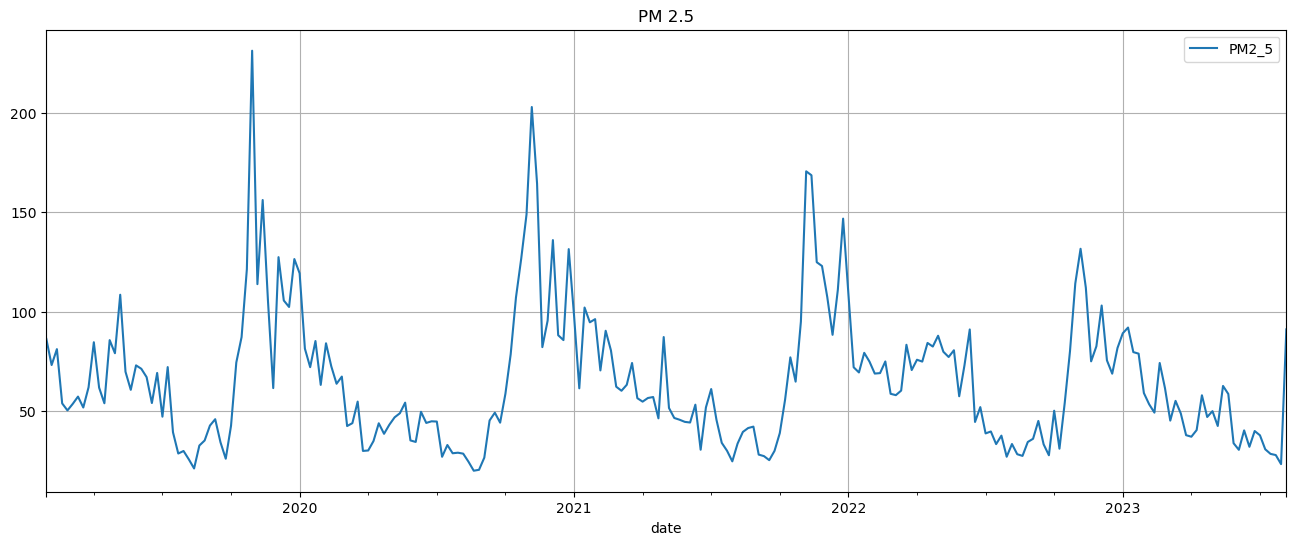

In [32]:
final_df_ts['PM2_5'].plot(figsize=(16,6),title='PM 2.5')
plt.grid()
plt.legend()

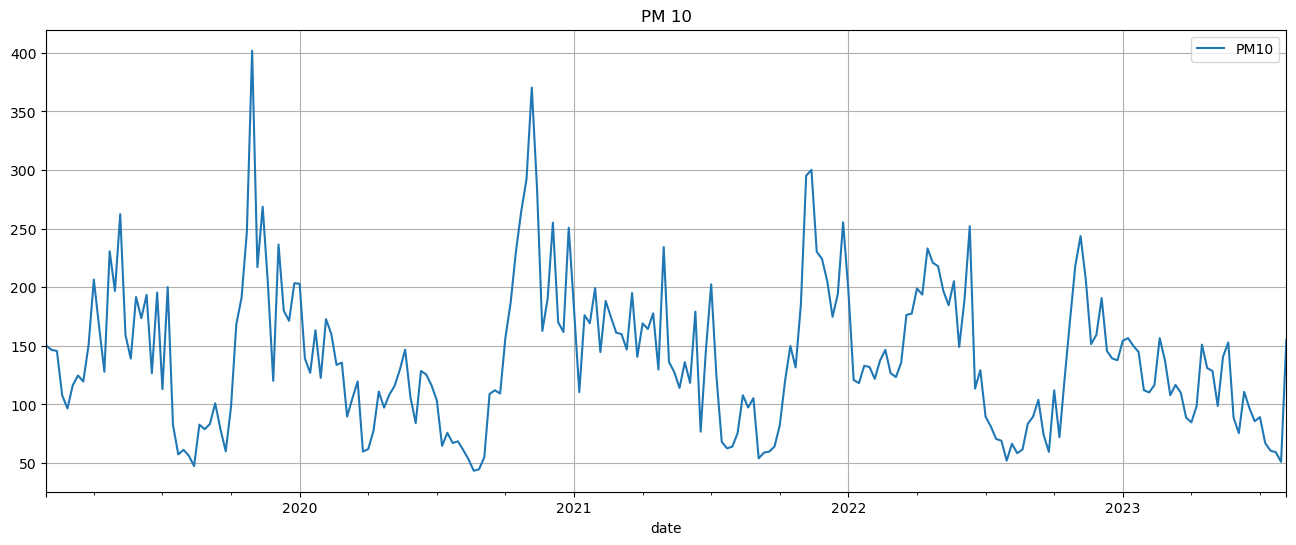

In [33]:
final_df_ts['PM10'].plot(figsize=(16,6),title='PM 10')
plt.grid()
plt.legend()

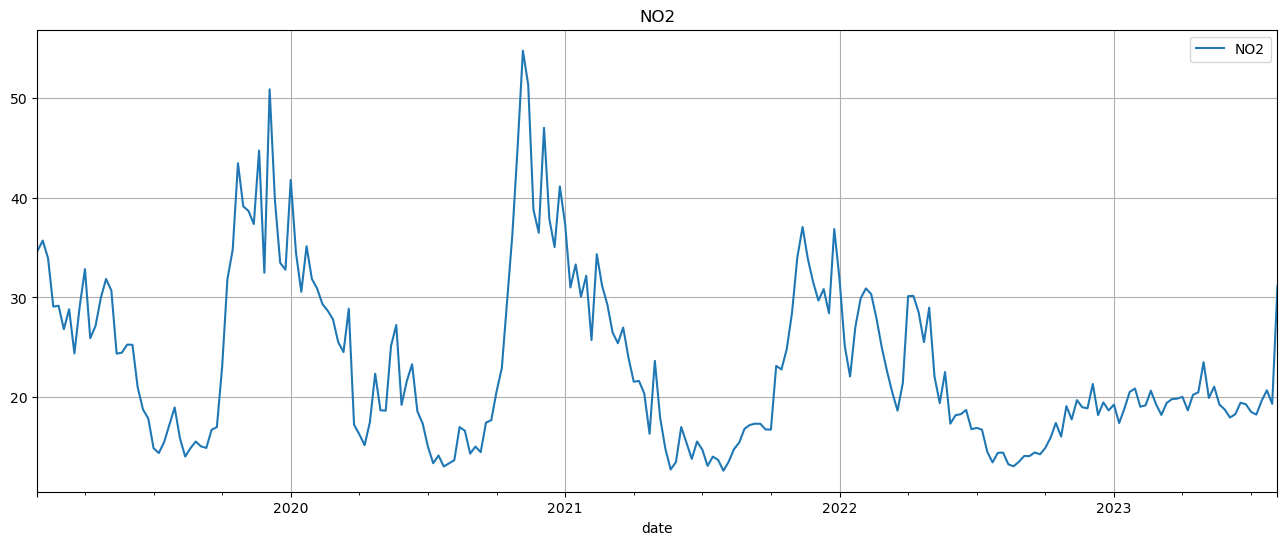

In [34]:
final_df_ts['NO2'].plot(figsize=(16,6),title='NO2')
plt.grid()
plt.legend()

In [35]:
final_df_ts['5_week_avg_PM2_5'] = final_df_ts['PM2_5'].rolling(window=5).mean()
final_df_ts.head()

PM2_5        PM10        NO2         RH        WS          WD  \
date                                                                            
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485   
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539   
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518   
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250   
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393   

            5_week_avg_PM2_5  
date                          
2019-02-03               NaN  
2019-02-10               NaN  
2019-02-17               NaN  
2019-02-24               NaN  
2019-03-03         68.880098

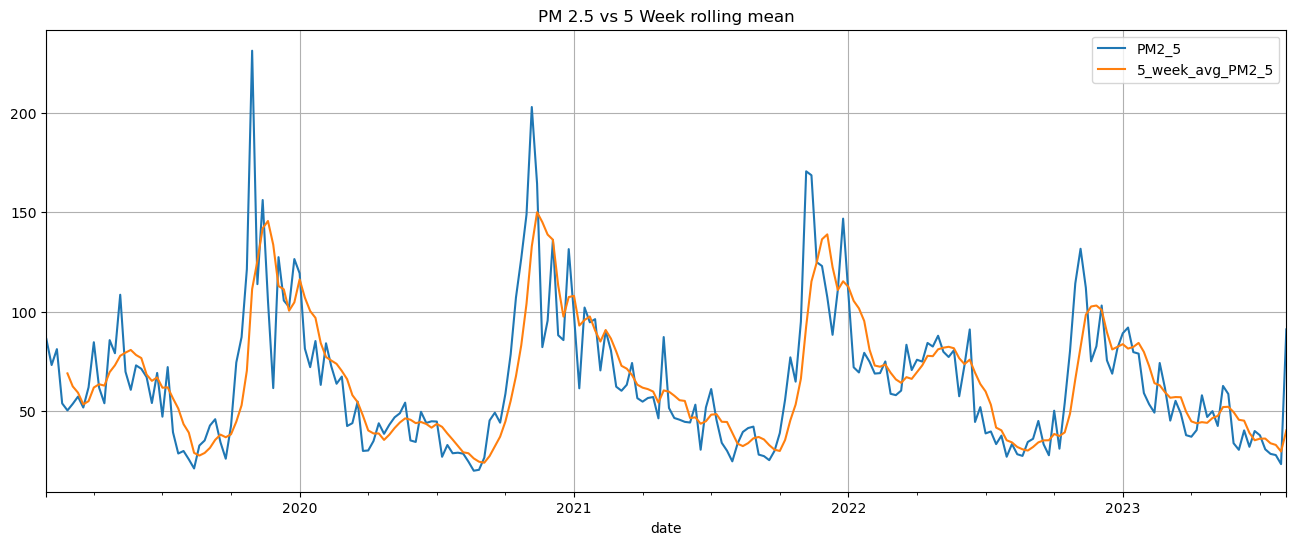

In [36]:
final_df_ts[['PM2_5','5_week_avg_PM2_5']].plot(figsize=(16,6),title='PM 2.5 vs 5 Week rolling mean')
plt.grid()
plt.legend()

In [37]:
final_df_ts['5_week_avg_PM10'] = final_df_ts['PM10'].rolling(window=5).mean()
final_df_ts.head()

PM2_5        PM10        NO2         RH        WS          WD  \
date                                                                            
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485   
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539   
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518   
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250   
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393   

            5_week_avg_PM2_5  5_week_avg_PM10  
date                                           
2019-02-03               NaN              NaN  
2019-02-10               NaN              NaN  
2019-02-17               NaN              NaN  
2019-02-24               NaN              NaN  
2019-03-03         68.880098       129.306393

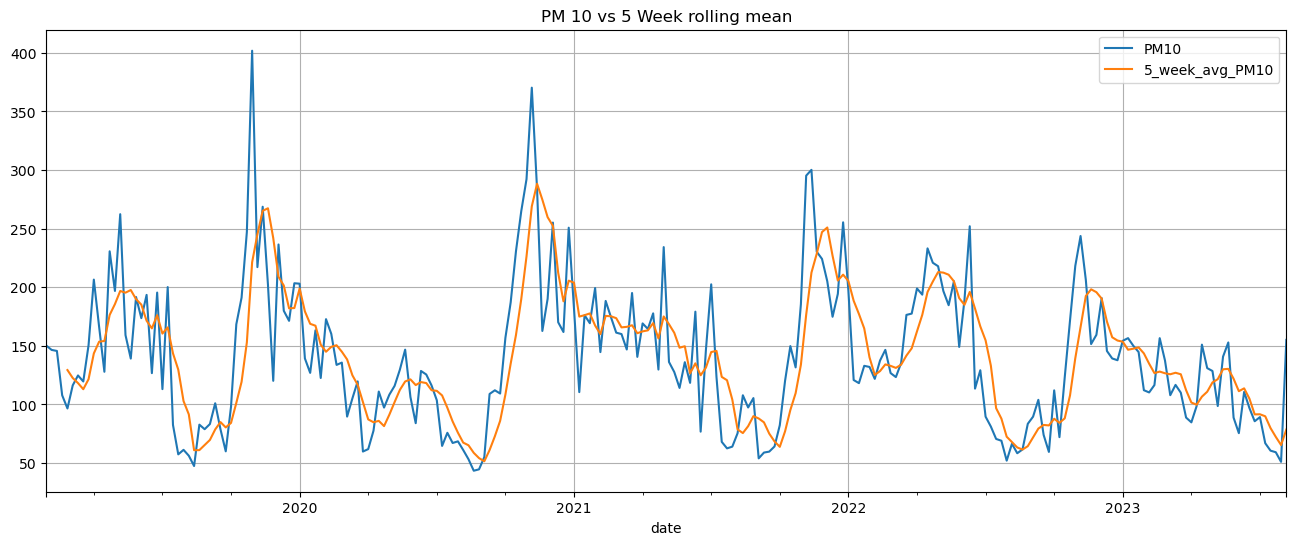

In [38]:
final_df_ts[['PM10','5_week_avg_PM10']].plot(figsize=(16,6),title='PM 10 vs 5 Week rolling mean')
plt.grid()
plt.legend()

In [39]:
final_df_ts['5_week_avg_NO2'] = final_df_ts['NO2'].rolling(window=5).mean()
final_df_ts.head()

PM2_5        PM10        NO2         RH        WS          WD  \
date                                                                            
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485   
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539   
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518   
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250   
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393   

            5_week_avg_PM2_5  5_week_avg_PM10  5_week_avg_NO2  
date                                                           
2019-02-03               NaN              NaN             NaN  
2019-02-10               NaN              NaN             NaN  
2019-02-17               NaN              NaN             NaN  
2019-02-24               NaN              NaN             NaN  
2019-03-03         68.880098       129.306393       32.509384

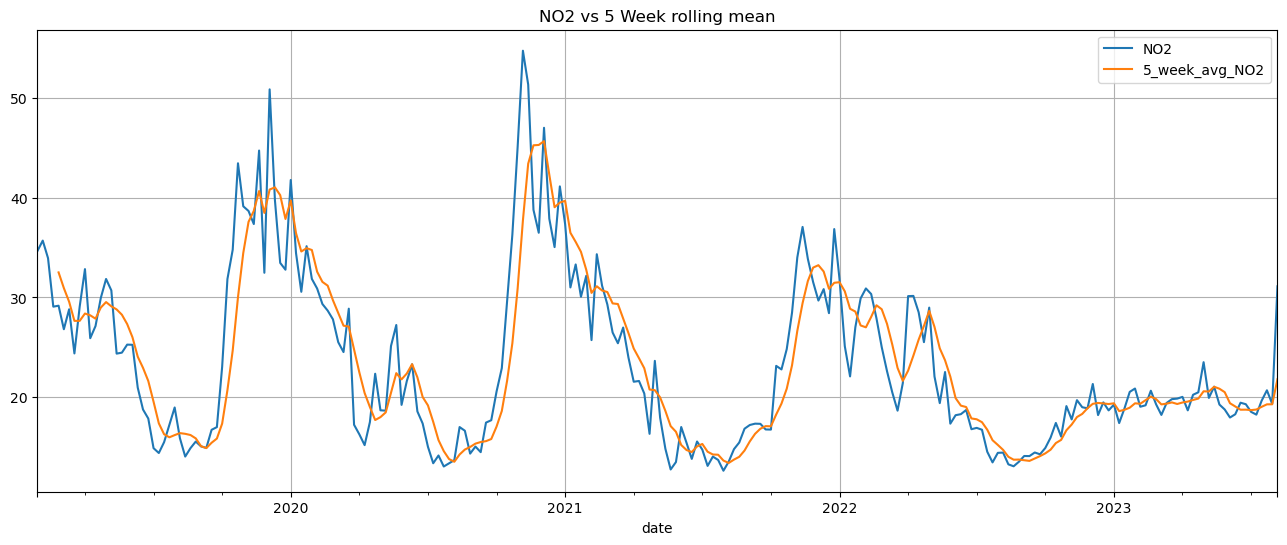

In [40]:
final_df_ts[['NO2','5_week_avg_NO2']].plot(figsize=(16,6),title='NO2 vs 5 Week rolling mean')
plt.grid()
plt.legend()

In [41]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle,trend = hpfilter(final_df_ts['PM2_5'],lamb=14400) #### lambda-> 100*(number of periods in a year)^2

final_df_ts['PM2_5_trend'] = trend

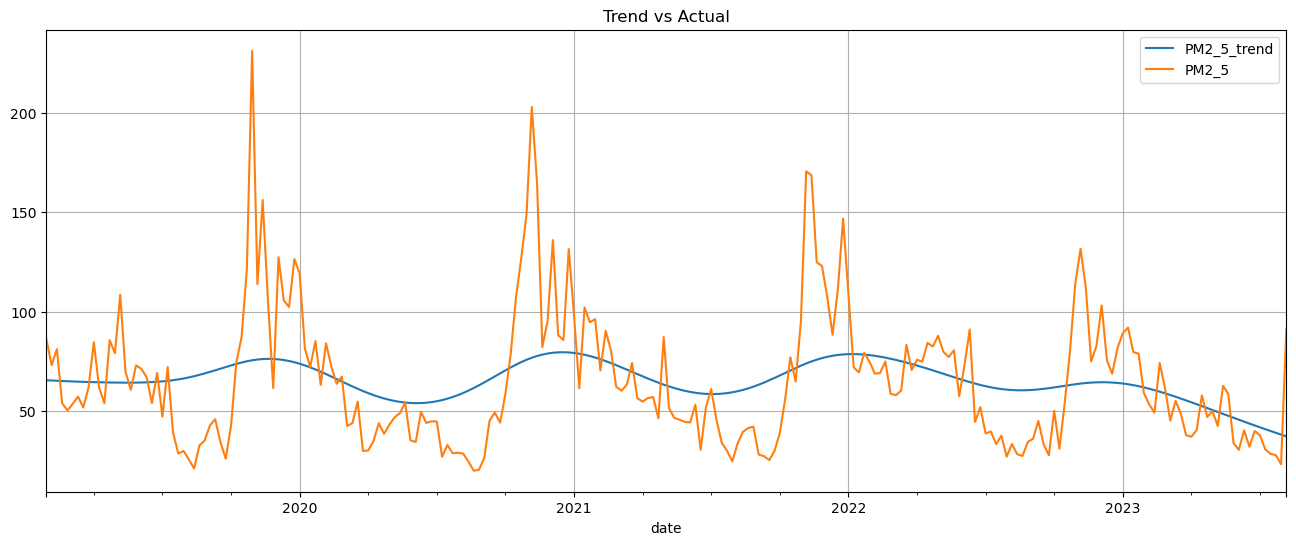

In [42]:
final_df_ts[['PM2_5_trend','PM2_5']].plot(title='Trend vs Actual',figsize=(16,6))
plt.grid()
plt.legend()

In [43]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle,trend = hpfilter(final_df_ts['PM10'],lamb=14400) #### lambda-> 100*(number of periods in a year)^2

final_df_ts['PM10_trend'] = trend

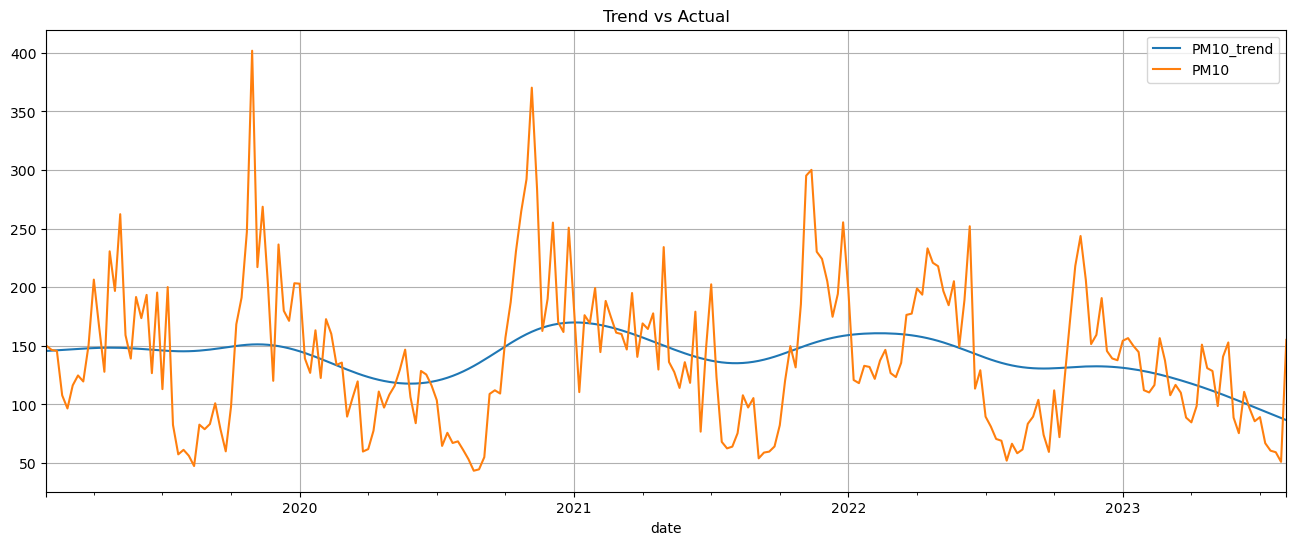

In [44]:
final_df_ts[['PM10_trend','PM10']].plot(title='Trend vs Actual',figsize=(16,6))
plt.grid()
plt.legend()

In [45]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle,trend = hpfilter(final_df_ts['NO2'],lamb=14400) #### lambda-> 100*(number of periods in a year)^2

final_df_ts['NO2_trend'] = trend

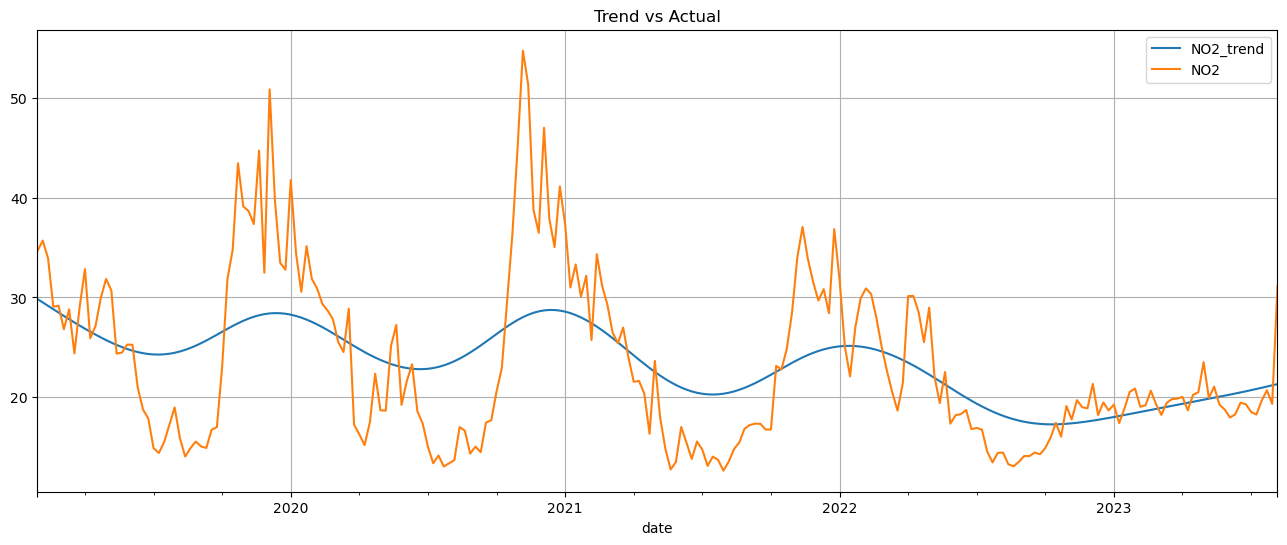

In [46]:
final_df_ts[['NO2_trend','NO2']].plot(title='Trend vs Actual',figsize=(16,6))
plt.grid()
plt.legend()

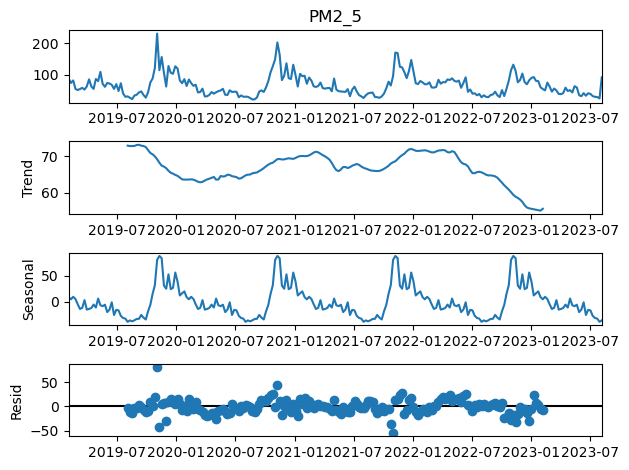

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
ets = seasonal_decompose(final_df_ts['PM2_5'],model='add')
ets.plot();

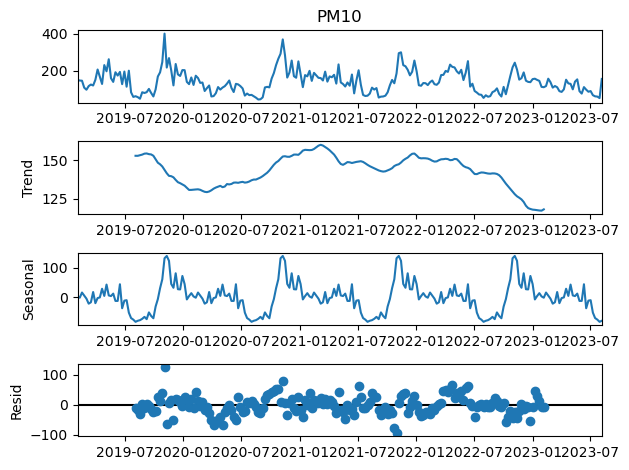

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
ets = seasonal_decompose(final_df_ts['PM10'],model='add')
ets.plot();

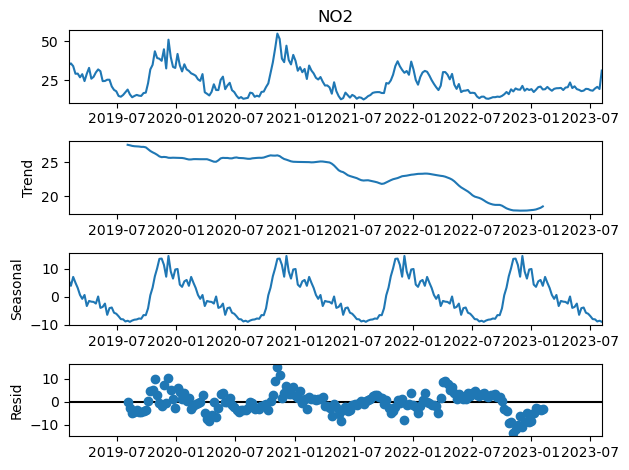

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
ets = seasonal_decompose(final_df_ts['NO2'],model='add')
ets.plot();

In [50]:
train_ts=final_df_ts.iloc[:208,:6]
train_ts

PM2_5        PM10        NO2         RH        WS          WD
date                                                                         
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393
...               ...         ...        ...        ...       ...         ...
2022-12-25  81.670714  137.684911  18.678929  89.098071  1.884214  234.302625
2023-01-01  89.080911  154.283661  19.258393  84.653589  2.158804  206.900625
2023-01-08  91.973119  156.541866  17.410236  92.688208  1.831586  210.085192
2023-01-15  79.599624  149.995115  18.871156  79.349944  2.473776  211.761737
2023-01-22  78.824107  144.677232  20.534375  71.797607  2.129143  201.862161

[208 rows x 6 columns]

In [51]:
test_ts=final_df_ts.iloc[208:,:6]
test_ts

PM2_5        PM10        NO2         RH        WS          WD
date                                                                         
2023-01-29  58.987054  112.113839  20.872321  83.251000  2.404679  199.821196
2023-02-05  53.323637  110.204205  19.046665  74.612636  2.595890  233.537710
2023-02-12  49.119541  116.498857  19.191008  63.699379  2.625976  218.809206
2023-02-19  74.115607  156.533661  20.650446  67.665179  2.181732  192.012107
2023-02-26  61.439363  137.473589  19.286991  63.349594  2.177386  206.345795
2023-03-05  45.095000  107.859911  18.226339  62.307071  2.638750  224.031857
2023-03-12  55.044149  116.644112  19.429761  61.270211  2.240748  201.512391
2023-03-19  48.679547  109.966794  19.808808  65.332333  2.274640  159.662621
2023-03-26  37.763142   88.752182  19.860171  70.831452  2.156646  181.513838
2023-04-02  36.987338   84.686825  20.034099  66.715059  2.222842  167.683606
2023-04-09  40.335600   98.613606  18.684820  41.623509  2.425112  250.478180
2023-04-16  57.863129  150.973450  20.244322  30.341224  2.286621  229.743830
2023-04-23  46.927893  130.947495  20.494730  38.185365  2.167691  173.894851
2023-04-30  49.872274  128.494504  23.511190  46.207175  2.135266  145.247230
2023-05-07  42.396059   98.620928  19.930116  57.901487  2.225404  162.908081
2023-05-14  62.562946  140.713982  21.059286  31.290786  2.526107  190.504393
2023-05-21  58.515446  152.856732  19.265268  34.744607  2.772625  228.170786
2023-05-28  33.713982   88.720018  18.770804  55.051821  2.500929  180.735768
2023-06-04  30.395042   75.456165  17.965832  63.277461  2.285070  226.904730
2023-06-11  40.177184  110.706522  18.291725  41.756854  2.705623  235.611444
2023-06-18  31.914369   96.904384  19.449611  53.249047  2.921711  212.182014
2023-06-25  39.845744   85.616348  19.299254  72.327672  2.275318  166.306835
2023-07-02  37.697411   89.166750  18.534554  81.255786  1.992875  137.963304
2023-07-09  30.661429   66.883036  18.254911  89.188768  2.242196  131.244107
2023-07-16  28.346470   60.531879  19.650118  89.794604  2.165320  162.322462
2023-07-23  27.750893   59.189196  20.694732  85.151839  2.270446  127.699071
2023-07-30  23.186172   50.975991  19.331594  89.677083  2.352300  185.006335
2023-08-06  91.046310  155.070699  31.116882  76.332642  1.399988  194.922651

# PM 2.5 - TS

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1 = ExponentialSmoothing(train_ts['PM2_5'],trend='mul',seasonal='mul',
                              initialization_method='estimated',seasonal_periods=52)
fit1 = model1.fit()

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [53]:
pred1=fit1.forecast(28)

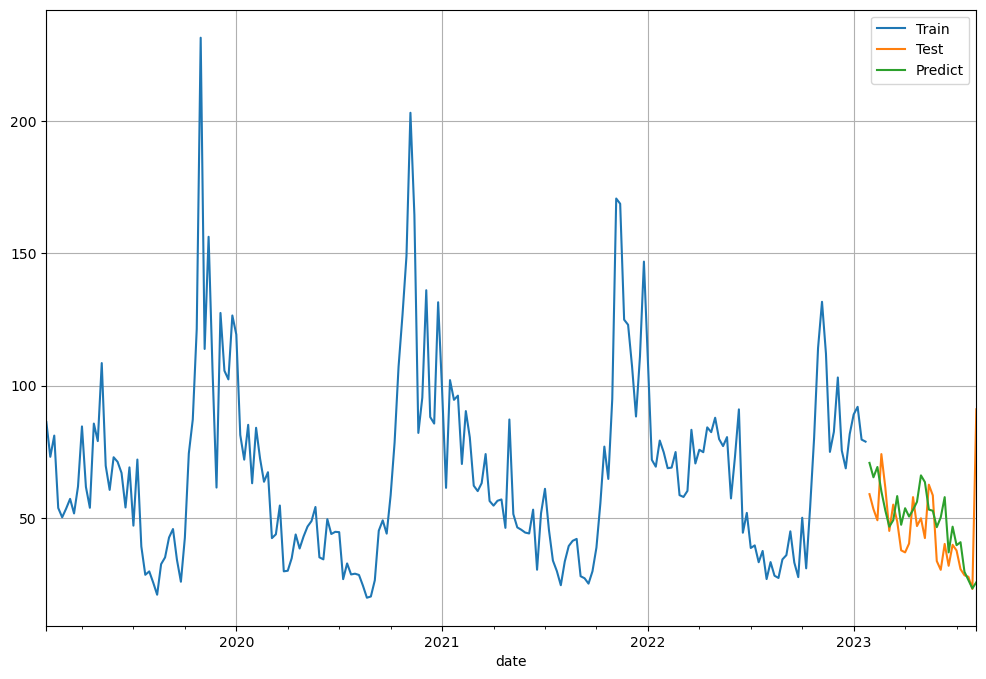

In [54]:
train_ts["PM2_5"].plot(figsize=(12,8), label='Train')
test_ts["PM2_5"].plot(label='Test')
pred1.plot(label='Predict')
plt.grid()
plt.legend()

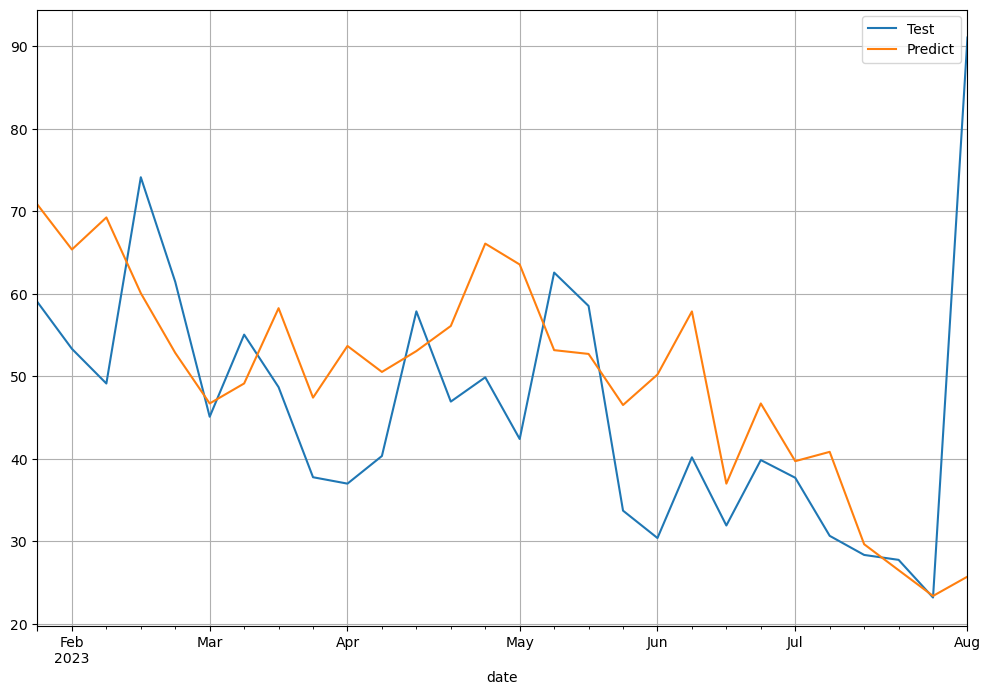

In [55]:
test_ts["PM2_5"].plot(figsize=(12,8), label='Test')
pred1.plot(label="Predict")
plt.grid()
plt.legend()

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
mae1=mean_absolute_error(test_ts["PM2_5"].values,pred1.values)
mae1

11.758530135314908

In [58]:
from pmdarima import auto_arima
arima1 = auto_arima(test_ts['PM2_5'],start_p=0,start_q=0,max_p=3,max_q=3,seasonal=False,trace=True,
                         error_action='ignore',suppress_warnings=True)
arima1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=298.918, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.583, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=277.330, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=245.434, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=241.895, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=242.988, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=266.492, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=244.966, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=237.024, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=235.039, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=235.086, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=237.026, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=235.267, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=239.033, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -114.520
Date:                Sun, 20 Aug 2023   AIC                            235.039
Time:                        12:29:34   BIC                            239.036
Sample:                    01-29-2023   HQIC                           236.261
                         - 08-06-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     47.0291      6.152      7.645      0.000      34.972      59.087
ma.L1          0.3857      0.487      0.792      0.429      -0.569       1.341
sigma2       207.7534     59.379      3.499      0.000      91.372     324.134
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.71
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                             1.68
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model2 = ARIMA(train_ts['PM2_5'],order=(0,0,1))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2_5   No. Observations:                  208
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -973.026
Date:                Sun, 20 Aug 2023   AIC                           1952.052
Time:                        12:29:51   BIC                           1962.064
Sample:                    02-03-2019   HQIC                          1956.100
                         - 01-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6669      3.928     17.228      0.000      59.969      75.365
ma.L1          0.6639      0.034     19.616      0.000       0.598       0.730
sigma2       675.4281     46.240     14.607      0.000     584.799     766.057
===================================================================================
Ljung-Box (L1) (Q):                  14.51   Jarque-Bera (JB):               297.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.63
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

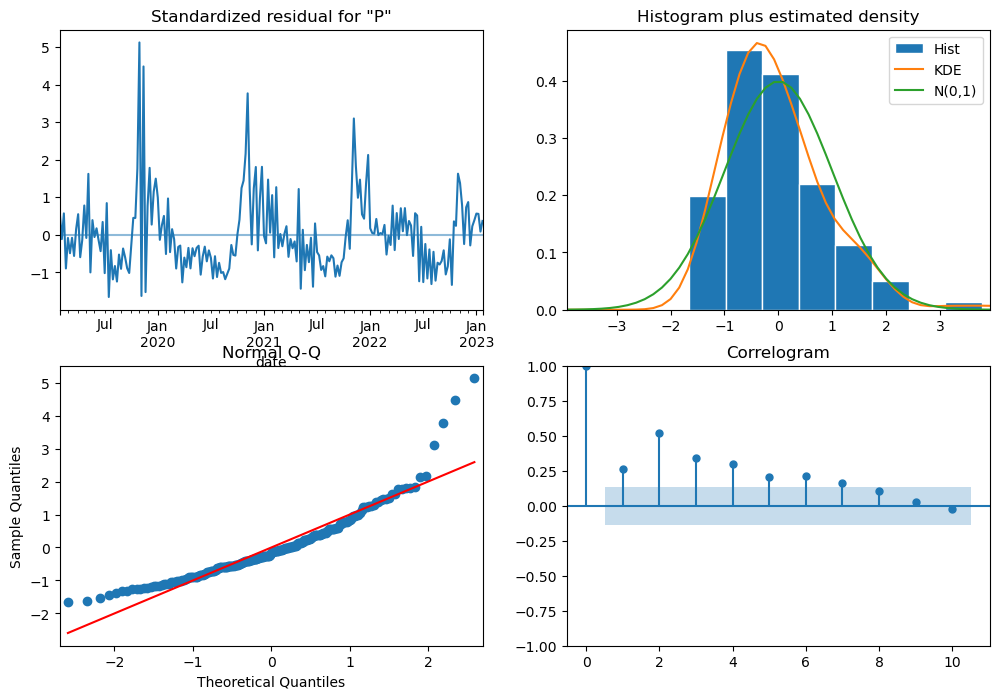

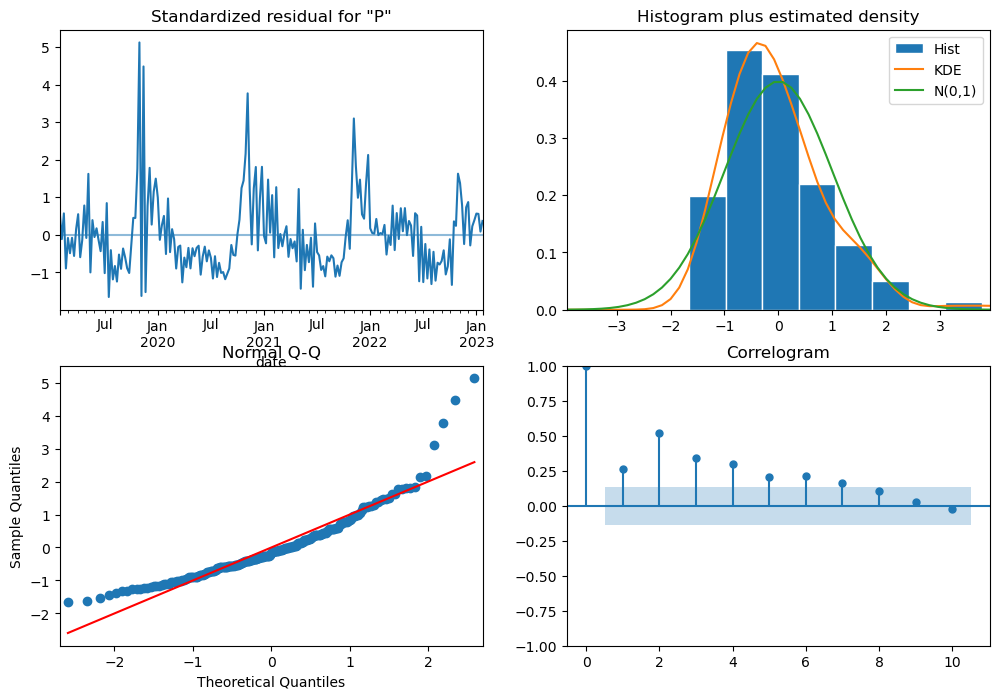

In [60]:
fit2.plot_diagnostics(figsize=(12,8))

In [61]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred2 = fit2.predict(start=start,end=end,dynamic=False,typ='levels')

In [62]:
for i in range(len(pred2)):
    print(f"predicted = {pred2[i]}, actual = {test_ts['PM2_5'][i]}")

predicted = 74.0665605765627, actual = 58.987053571428575
predicted = 67.666878615846, actual = 53.32363667254878
predicted = 67.666878615846, actual = 49.11954120224042
predicted = 67.666878615846, actual = 74.11560714285714
predicted = 67.666878615846, actual = 61.43936263081184
predicted = 67.666878615846, actual = 45.095000000000006
predicted = 67.666878615846, actual = 55.04414869341725
predicted = 67.666878615846, actual = 48.67954738683449
predicted = 67.666878615846, actual = 37.76314181218379
predicted = 67.666878615846, actual = 36.987338240755214
predicted = 67.666878615846, actual = 40.33560026162369
predicted = 67.666878615846, actual = 57.86312944299563
predicted = 67.666878615846, actual = 46.92789250882317
predicted = 67.666878615846, actual = 49.87227369341725
predicted = 67.666878615846, actual = 42.39605905938327
predicted = 67.666878615846, actual = 62.56294642857143
predicted = 67.666878615846, actual = 58.51544642857142
predicted = 67.666878615846, actual = 33.713

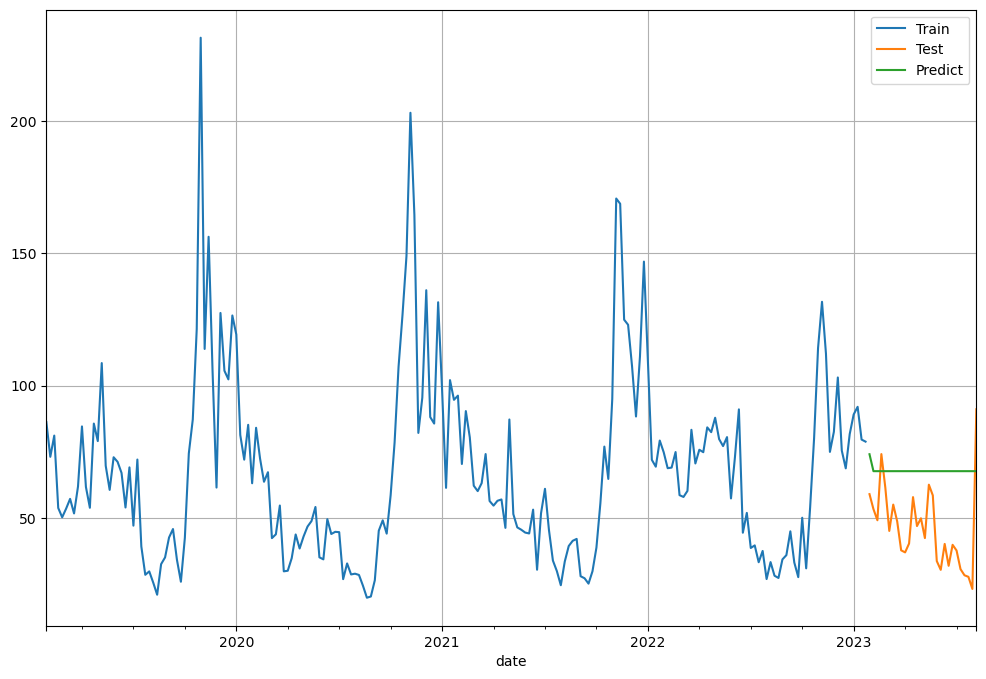

In [63]:
train_ts["PM2_5"].plot(figsize=(12,8), label='Train')
test_ts["PM2_5"].plot(label='Test')
pred2.plot(label='Predict')
plt.grid()
plt.legend()

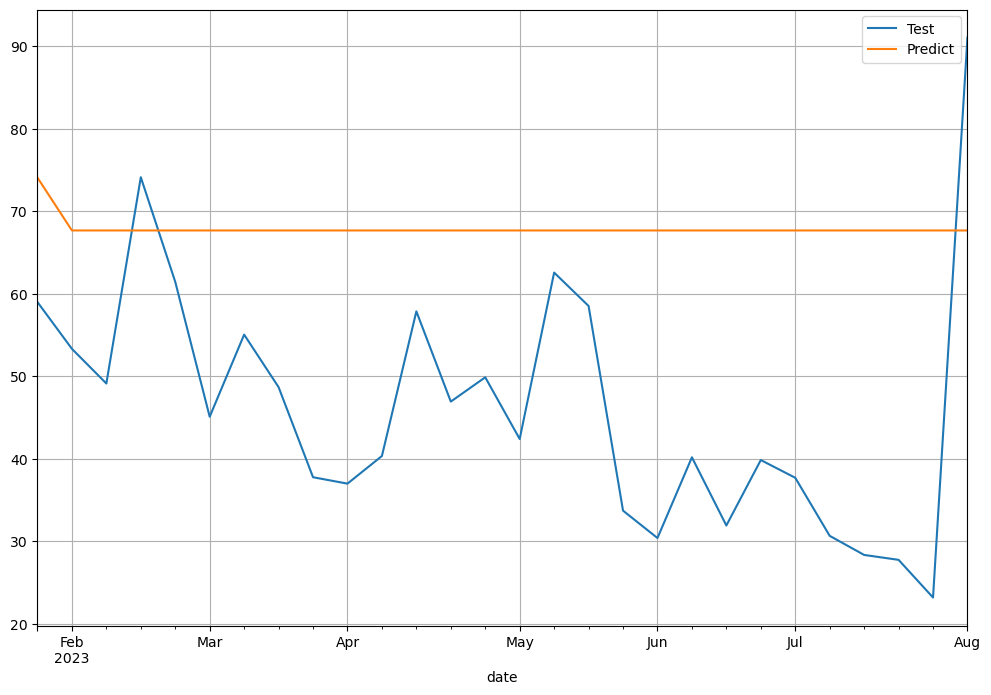

In [64]:
test_ts["PM2_5"].plot(figsize=(12,8), label='Test')
pred2.plot(label="Predict")
plt.grid()
plt.legend()

In [65]:
mae2=mean_absolute_error(test_ts["PM2_5"].values,pred2.values)
mae2

23.82020973967291

In [66]:
sarima1 = auto_arima(train_ts['PM2_5'],start_p=0,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=52,
                          seasonal=True,trace=True,stepwise=True,
           error_action='ignore',suppress_warnings=True)
sarima1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2070.509, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1857.148, Time=2.25 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2393.768, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1882.918, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=1858.532, Time=9.54 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=1857.777, Time=2.79 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1862.072, Time=1.22 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=16.32 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=1854.230, Time=1.87 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1882.706, Time=0.08 sec
 ARIMA(2,0,0)(2,0,0)[52] intercept   : AIC=1855.175, Time=10.80 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=1853.944, Time=3.73 sec
 ARIMA(2,0,0)(0,0,1)[52] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  208
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 52)   Log Likelihood                -916.722
Date:                              Sun, 20 Aug 2023   AIC                           1847.444
Time:                                      12:34:24   BIC                           1870.807
Sample:                                  02-03-2019   HQIC                          1856.891
                                       - 01-22-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9317      1.423      1.358      0.175      -0.857       4.720
ar.L1          0.4759      0.055      8.599      0.000       0.367       0.584
ar.L2          0.0669      0.057      1.173      0.241      -0.045       0.179
ar.L3          0.2040      0.056      3.673      0.000       0.095       0.313
ar.S.L52       0.8879      0.080     11.034      0.000       0.730       1.046
ma.S.L52      -0.5890      0.152     -3.879      0.000      -0.887      -0.291
sigma2       347.4838     25.652     13.546      0.000     297.208     397.760
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               914.15
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             2.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model3 = SARIMAX(train_ts['PM2_5'],order=(3,0,0),seasonal_order=(1,0,1,52))
fit3 = model3.fit()
fit3.summary()

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                PM2_5   No. Observations:                  208
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 52)   Log Likelihood                -923.424
Date:                              Sun, 20 Aug 2023   AIC                           1858.847
Time:                                      12:34:27   BIC                           1878.872
Sample:                                  02-03-2019   HQIC                          1866.944
                                       - 01-22-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5447      0.050     10.974      0.000       0.447       0.642
ar.L2          0.1149      0.057      2.014      0.044       0.003       0.227
ar.L3          0.2755      0.048      5.782      0.000       0.182       0.369
ar.S.L52       0.9300      0.074     12.619      0.000       0.786       1.074
ma.S.L52      -0.6813      0.169     -4.034      0.000      -1.012      -0.350
sigma2       358.8627     30.468     11.778      0.000     299.147     418.579
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               591.98
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             1.51
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

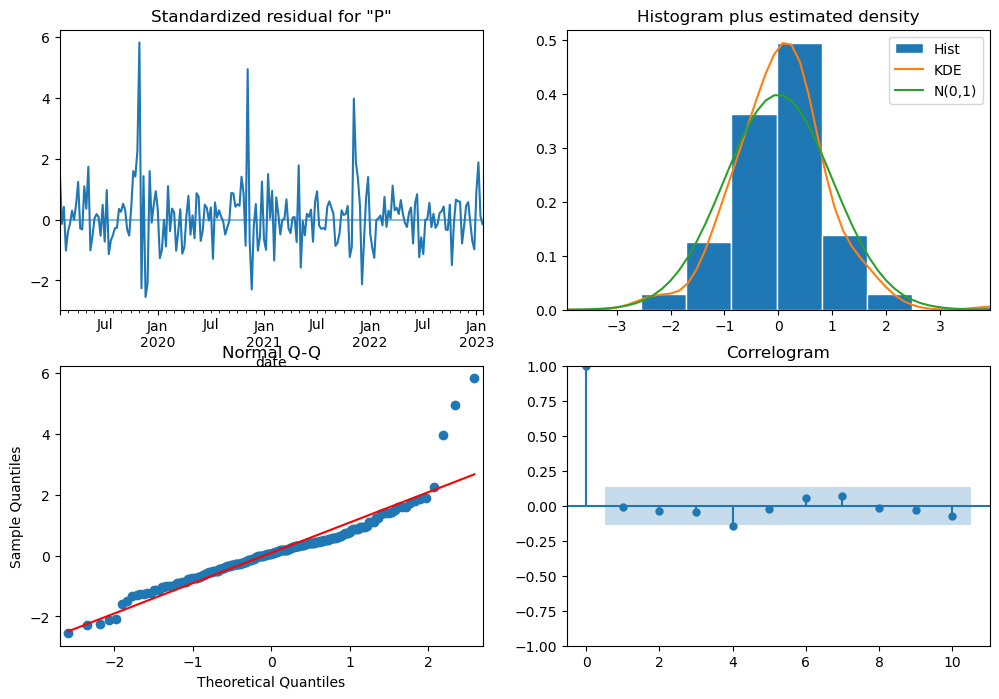

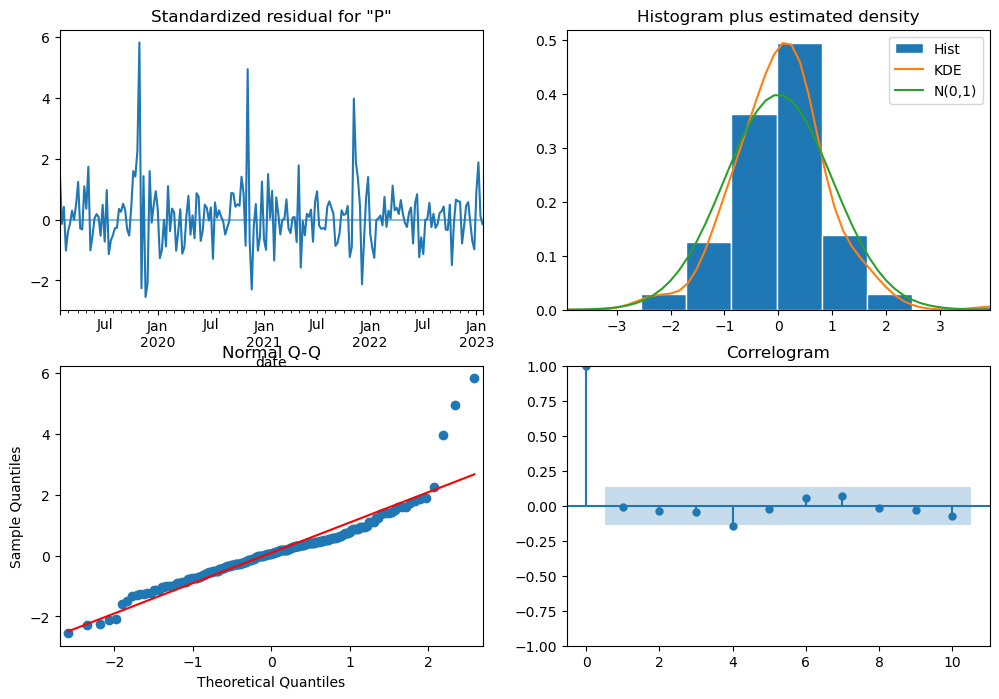

In [68]:
fit3.plot_diagnostics(figsize=(12,8))

In [69]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred3 = fit3.predict(start=start,end=end,dynamic=False,typ='levels')

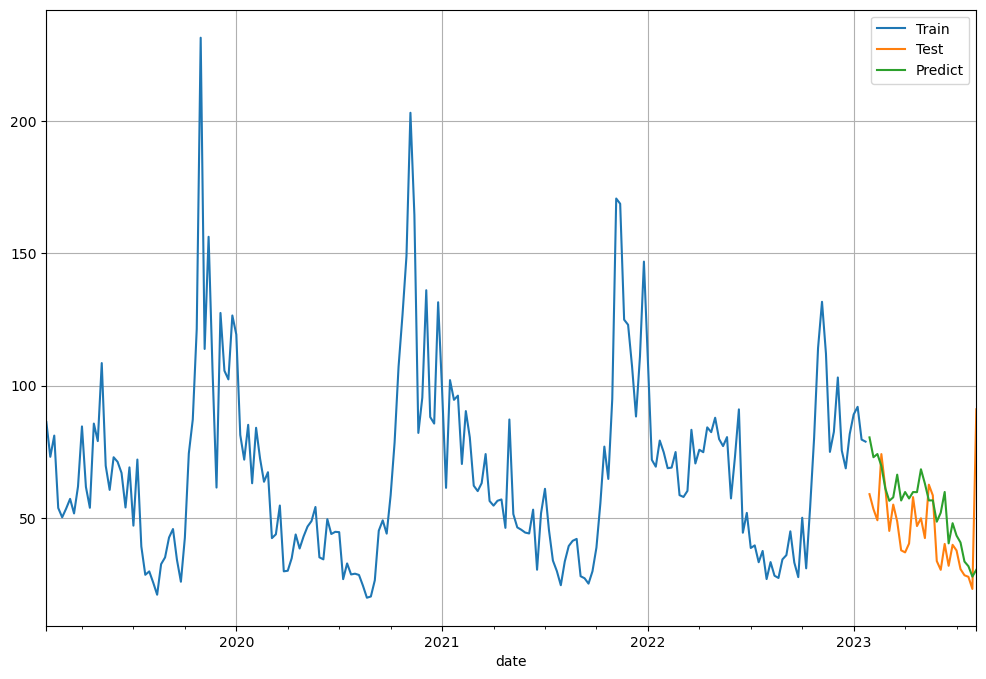

In [70]:
train_ts["PM2_5"].plot(figsize=(12,8), label='Train')
test_ts["PM2_5"].plot(label='Test')
pred3.plot(label='Predict')
plt.grid()
plt.legend()

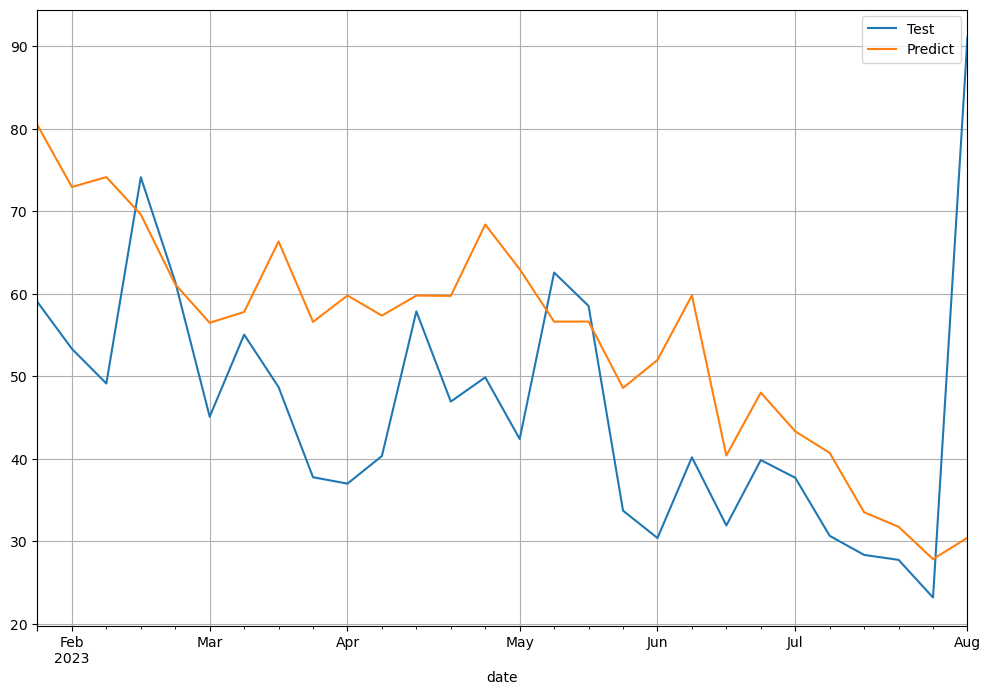

In [71]:
test_ts["PM2_5"].plot(figsize=(12,8), label='Test')
pred3.plot(label="Predict")
plt.grid()
plt.legend()

In [72]:
mae3=mean_absolute_error(test_ts["PM2_5"].values,pred3.values)
mae3

13.777734508551722

In [73]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [74]:
final_df_ts

PM2_5        PM10        NO2         RH        WS          WD  \
date                                                                            
2019-02-03  86.197166  150.135864  34.662077  83.756810  1.164988  228.507485   
2019-02-10  73.091719  146.494673  35.696095  71.901280  1.434988  188.229539   
2019-02-17  81.101429  145.611875  33.939375  75.198054  1.273750  184.781518   
2019-02-24  53.768304  107.756339  29.077500  70.764196  1.634821  186.801250   
2019-03-03  50.241875   96.533214  29.171875  72.403964  1.452054  185.743393   
...               ...         ...        ...        ...       ...         ...   
2023-07-09  30.661429   66.883036  18.254911  89.188768  2.242196  131.244107   
2023-07-16  28.346470   60.531879  19.650118  89.794604  2.165320  162.322462   
2023-07-23  27.750893   59.189196  20.694732  85.151839  2.270446  127.699071   
2023-07-30  23.186172   50.975991  19.331594  89.677083  2.352300  185.006335   
2023-08-06  91.046310  155.070699  31.116882  76.332642  1.399988  194.922651   

            5_week_avg_PM2_5  5_week_avg_PM10  5_week_avg_NO2  PM2_5_trend  \
date                                                                         
2019-02-03               NaN              NaN             NaN    65.435760   
2019-02-10               NaN              NaN             NaN    65.302637   
2019-02-17               NaN              NaN             NaN    65.170956   
2019-02-24               NaN              NaN             NaN    65.042699   
2019-03-03         68.880098       129.306393       32.509384    64.920956   
...                      ...              ...             ...          ...   
2023-07-09         36.059227        89.855408       18.766011    40.785942   
2023-07-16         33.693084        79.820479       19.037690    39.866878   
2023-07-23         32.860389        72.277442       19.286714    38.956200   
2023-07-30         29.528475        65.349370       19.293182    38.051974   
2023-08-06         40.198255        78.530160       21.809647    37.151491   

            PM10_trend  NO2_trend  
date                               
2019-02-03  145.597170  29.839120  
2019-02-10  145.889748  29.498128  
2019-02-17  146.182641  29.157471  
2019-02-24  146.476206  28.817915  
2019-03-03  146.770761  28.480556  
...                ...        ...  
2023-07-09   93.855680  20.826082  
2023-07-16   92.025877  20.946442  
2023-07-23   90.202995  21.068560  
2023-07-30   88.387028  21.191909  
2023-08-06   86.575817  21.315939  

[236 rows x 12 columns]

In [75]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(final_df_ts['PM2_5'].values.reshape(-1, 1))

# Split the dataset into training and test sets (80% for training, 20% for testing)
train_size = int(len(normalized_data) * 0.80)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]

In [76]:
# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Set the sequence length for input sequences
sequence_length = 24

# Create input sequences and corresponding labels for the training set
train_x, train_y = create_sequences(train_data, sequence_length)

# Create input sequences and corresponding labels for the test set
test_x, test_y = create_sequences(test_data, sequence_length)

In [77]:
# Build the LSTM model
model4 = Sequential()
model4.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
model4.add(LSTM(50))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model4.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model4.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 2s 9ms/step - loss: 0.0238
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 3/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 4/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 5/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 6/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 7/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 8/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 9/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 10/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 11/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 12/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 13/50
41/41 [==============================

In [78]:
# Make predictions on the test set
pred4 = model4.predict(test_x)

# Denormalize the predicted values
pred4 = scaler.inverse_transform(pred4)

# Print the predicted values
for i in range(len(pred4)):
    print(f"Predicted: {pred4[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

1/1 [==============================] - 1s 519ms/step
Predicted: [53.272938], Actual: [[61.43936263]]
Predicted: [50.889812], Actual: [[45.095]]
Predicted: [42.997395], Actual: [[55.04414869]]
Predicted: [44.66847], Actual: [[48.67954739]]
Predicted: [42.13253], Actual: [[37.76314181]]
Predicted: [35.303093], Actual: [[36.98733824]]
Predicted: [31.397131], Actual: [[40.33560026]]
Predicted: [31.874256], Actual: [[57.86312944]]
Predicted: [44.697376], Actual: [[46.92789251]]
Predicted: [46.347305], Actual: [[49.87227369]]
Predicted: [50.328224], Actual: [[42.39605906]]
Predicted: [48.28268], Actual: [[62.56294643]]
Predicted: [60.66505], Actual: [[58.51544643]]
Predicted: [64.61778], Actual: [[33.71398214]]
Predicted: [51.165627], Actual: [[30.39504155]]
Predicted: [40.77523], Actual: [[40.17718441]]
Predicted: [40.377777], Actual: [[31.91436882]]
Predicted: [34.778145], Actual: [[39.84574382]]
Predicted: [37.467213], Actual: [[37.69741071]]
Predicted: [38.70151], Actual: [[30.66142857]]

In [79]:
actual_lstm=scaler.inverse_transform(test_y)

actual_lstm

array([[61.43936263],
       [45.095     ],
       [55.04414869],
       [48.67954739],
       [37.76314181],
       [36.98733824],
       [40.33560026],
       [57.86312944],
       [46.92789251],
       [49.87227369],
       [42.39605906],
       [62.56294643],
       [58.51544643],
       [33.71398214],
       [30.39504155],
       [40.17718441],
       [31.91436882],
       [39.84574382],
       [37.69741071],
       [30.66142857],
       [28.34647012],
       [27.75089286],
       [23.18617239],
       [91.04631024]])

In [80]:
time=final_df_ts.index[-24:]
time

DatetimeIndex(['2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28', '2023-06-04', '2023-06-11',
               '2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09',
               '2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')

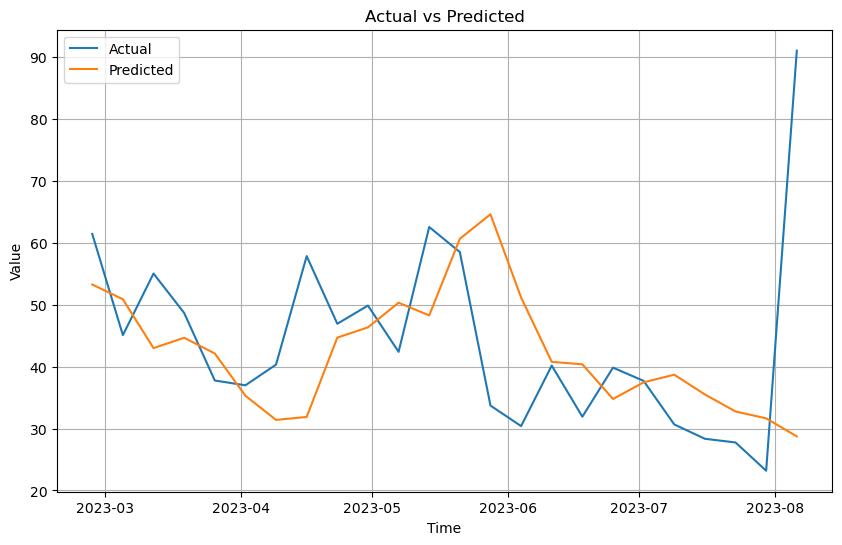

In [81]:
pred_4 = np.array(pred4)
actual_lstm = np.array(actual_lstm)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_lstm, label='Actual')
plt.plot(time,pred_4, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [82]:
mae4=mean_absolute_error(actual_lstm,pred_4)
mae4

10.75542391553585

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, Flatten
from sklearn.metrics import mean_squared_error

In [84]:
model5 = Sequential()
model5.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(50, activation='relu'))
model5.add(Dense(1))
model5.compile(loss='mse', optimizer="adam")

# Train the model
model5.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model5.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 7/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 8/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 10/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 11/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 12/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 13/50
41/41 [==============================

In [85]:
# Make predictions on the test set
pred5 = model5.predict(test_x)

# Denormalize the predicted values
pred5 = scaler.inverse_transform(pred5)

# Print the predicted values
for i in range(len(pred5)):
    print(f"Predicted: {pred5[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

1/1 [==============================] - 0s 63ms/step
Predicted: [59.42466], Actual: [[61.43936263]]
Predicted: [60.129143], Actual: [[45.095]]
Predicted: [62.015797], Actual: [[55.04414869]]
Predicted: [53.480106], Actual: [[48.67954739]]
Predicted: [40.03023], Actual: [[37.76314181]]
Predicted: [29.810986], Actual: [[36.98733824]]
Predicted: [34.420788], Actual: [[40.33560026]]
Predicted: [41.107124], Actual: [[57.86312944]]
Predicted: [44.108997], Actual: [[46.92789251]]
Predicted: [43.4565], Actual: [[49.87227369]]
Predicted: [53.70768], Actual: [[42.39605906]]
Predicted: [55.842728], Actual: [[62.56294643]]
Predicted: [42.15107], Actual: [[58.51544643]]
Predicted: [47.461582], Actual: [[33.71398214]]
Predicted: [59.904224], Actual: [[30.39504155]]
Predicted: [47.048534], Actual: [[40.17718441]]
Predicted: [33.457596], Actual: [[31.91436882]]
Predicted: [25.880396], Actual: [[39.84574382]]
Predicted: [32.52129], Actual: [[37.69741071]]
Predicted: [32.54191], Actual: [[30.66142857]]
P

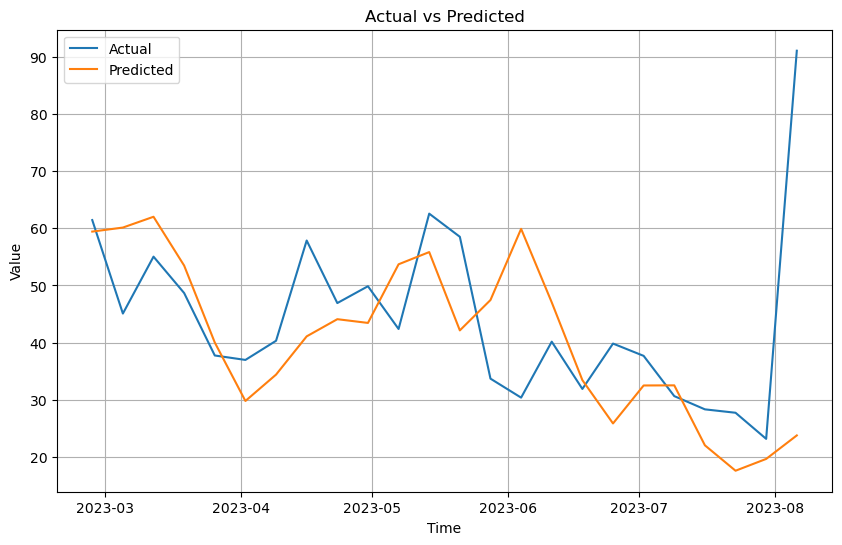

In [86]:
actual_cnn=scaler.inverse_transform(test_y)
pred_5 = np.array(pred5)
actual_cnn = np.array(actual_cnn)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_cnn, label='Actual')
plt.plot(time,pred_5, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [87]:
mae5=mean_absolute_error(actual_cnn,pred_5)
print(mae5)

11.018660739662318


# PM 10 - TS

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


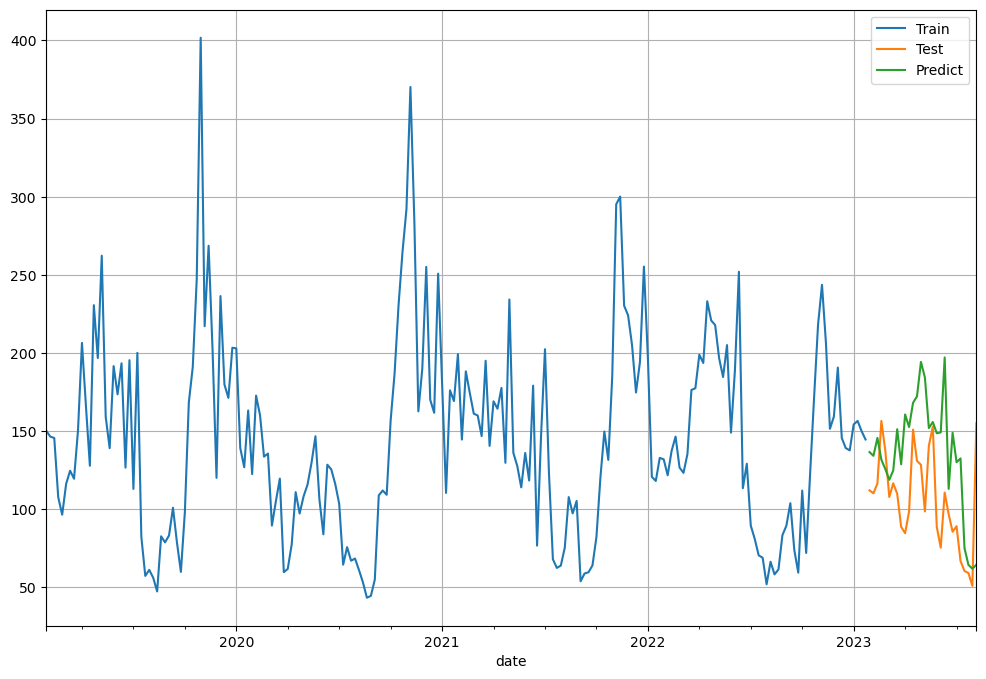

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model6 = ExponentialSmoothing(train_ts['PM10'],trend='mul',seasonal='mul',
                              initialization_method='estimated',seasonal_periods=52)
fit6 = model6.fit()
pred6=fit6.forecast(28)
train_ts["PM10"].plot(figsize=(12,8), label='Train')
test_ts["PM10"].plot(label='Test')
pred6.plot(label='Predict')
plt.grid()
plt.legend()

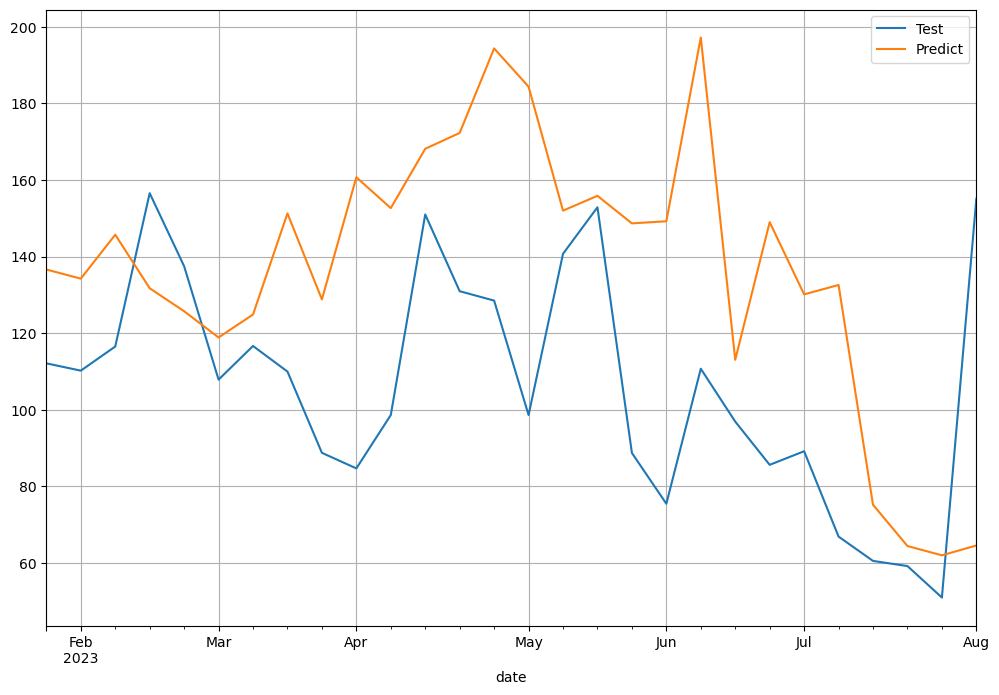

In [89]:
test_ts["PM10"].plot(figsize=(12,8), label='Test')
pred6.plot(label="Predict")
plt.grid()
plt.legend()

In [90]:
mae6=mean_absolute_error(test_ts["PM10"].values,pred6.values)
mae6

39.17247144943534

In [91]:
from pmdarima import auto_arima
arima2 = auto_arima(test_ts['PM10'],start_p=0,start_q=0,max_p=3,max_q=3,seasonal=False,trace=True,
                         error_action='ignore',suppress_warnings=True)
arima2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=344.944, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=279.195, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=319.290, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=280.804, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=278.285, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=283.004, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=276.567, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=305.892, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=278.563, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=278.563, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=272.436, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=270.437, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=268.447, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -131.223
Date:                Sun, 20 Aug 2023   AIC                            268.447
Time:                        12:36:29   BIC                            272.443
Sample:                    01-29-2023   HQIC                           269.669
                         - 08-06-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    107.9103     10.435     10.341      0.000      87.458     128.362
ma.L1          0.5851      0.234      2.500      0.012       0.126       1.044
sigma2       678.7482    208.387      3.257      0.001     270.317    1087.180
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.27
Prob(Q):                              0.86   Prob(JB):                         0.19
Heteroskedasticity (H):               4.12   Skew:                             0.83
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model7 = ARIMA(train_ts['PM10'],order=(0,0,1))
fit7 = model7.fit()
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  208
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1109.379
Date:                Sun, 20 Aug 2023   AIC                           2224.757
Time:                        12:36:55   BIC                           2234.770
Sample:                    02-03-2019   HQIC                          2228.806
                         - 01-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.8602      6.227     23.263      0.000     132.655     157.065
ma.L1          0.5542      0.049     11.399      0.000       0.459       0.650
sigma2      2508.5630    218.376     11.487      0.000    2080.553    2936.573
===================================================================================
Ljung-Box (L1) (Q):                  11.24   Jarque-Bera (JB):                39.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.86
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

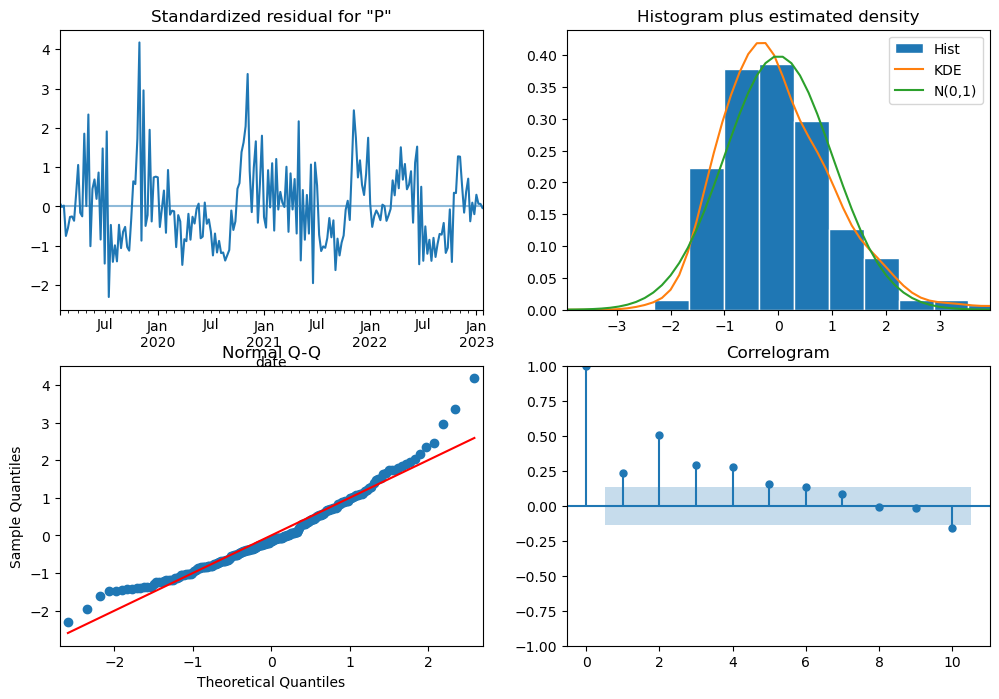

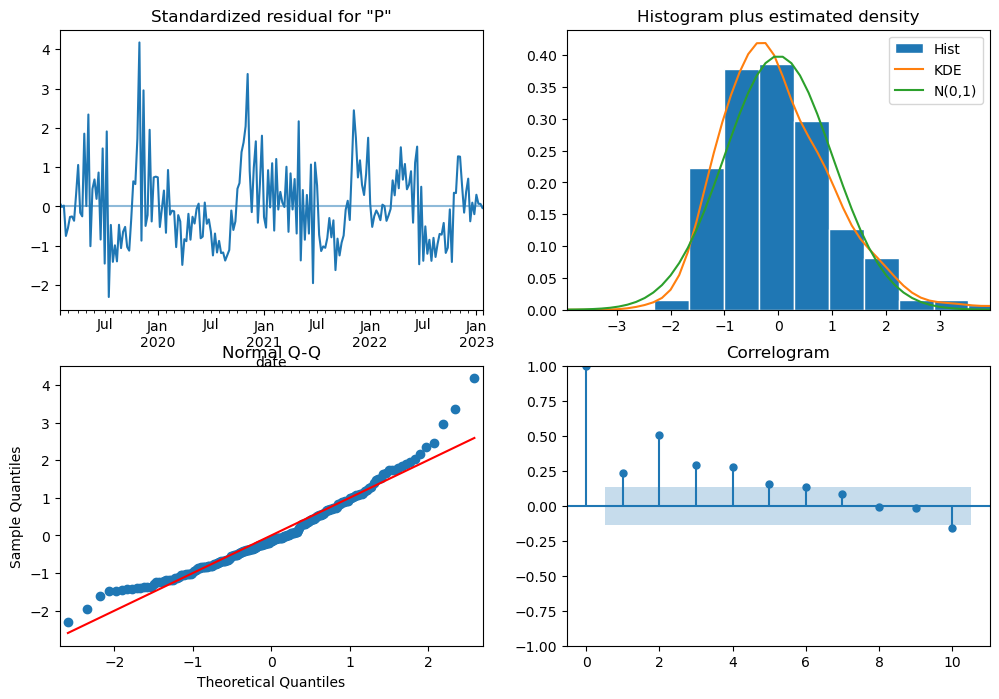

In [93]:
fit7.plot_diagnostics(figsize=(12,8))

In [94]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred7 = fit7.predict(start=start,end=end,dynamic=False,typ='levels')
for i in range(len(pred7)):
    print(f"predicted = {pred7[i]}, actual = {test_ts['PM10'][i]}")

predicted = 143.76650105274246, actual = 112.11383928571429
predicted = 144.86024131376243, actual = 110.20420515056922
predicted = 144.86024131376243, actual = 116.49885672970989
predicted = 144.86024131376243, actual = 156.53366071428573
predicted = 144.86024131376243, actual = 137.47358887256703
predicted = 144.86024131376243, actual = 107.8599107142857
predicted = 144.86024131376243, actual = 116.64411150385604
predicted = 144.86024131376243, actual = 109.96679443628351
predicted = 144.86024131376243, actual = 88.75218210613295
predicted = 144.86024131376243, actual = 84.68682496327581
predicted = 144.86024131376243, actual = 98.61360631656261
predicted = 144.86024131376243, actual = 150.97344955012855
predicted = 144.86024131376243, actual = 130.94749522585383
predicted = 144.86024131376243, actual = 128.4945043609989
predicted = 144.86024131376243, actual = 98.62092815828132
predicted = 144.86024131376243, actual = 140.71398214285713
predicted = 144.86024131376243, actual = 152.8

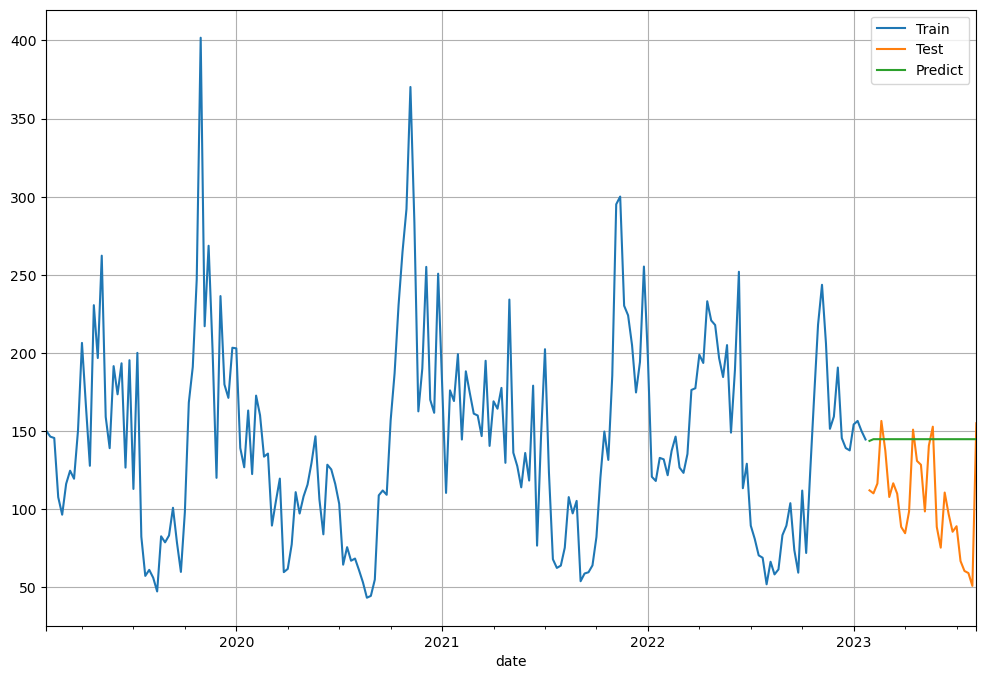

In [95]:
train_ts["PM10"].plot(figsize=(12,8), label='Train')
test_ts["PM10"].plot(label='Test')
pred7.plot(label='Predict')
plt.grid()
plt.legend()

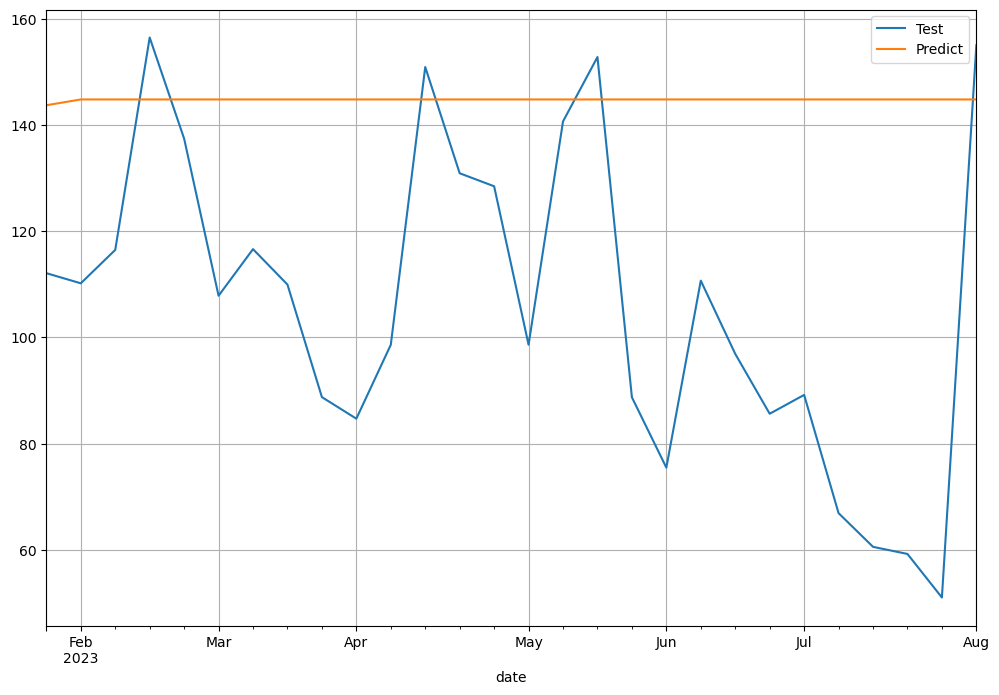

In [96]:
test_ts["PM10"].plot(figsize=(12,8), label='Test')
pred7.plot(label="Predict")
plt.grid()
plt.legend()


In [97]:
mae7=mean_absolute_error(test_ts["PM10"].values,pred7.values)
mae7

40.9215895869412

In [98]:
sarima2 = auto_arima(train_ts['PM10'],start_p=0,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=52,
                          seasonal=True,trace=True,stepwise=True,
           error_action='ignore',suppress_warnings=True)
sarima2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2315.291, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2147.576, Time=2.92 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2195.854, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2697.822, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2161.854, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2148.503, Time=10.24 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2146.850, Time=3.48 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2150.002, Time=1.25 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=16.77 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=15.38 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=2150.583, Time=7.13 sec
 ARIMA(1,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=18.18 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=2240.108, Time=2.94 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=2140.610, Time=3.90 sec
 ARIMA(2,0,0)(0,0,1)[52] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  208
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 52)   Log Likelihood               -1063.209
Date:                              Sun, 20 Aug 2023   AIC                           2140.418
Time:                                      12:42:31   BIC                           2163.781
Sample:                                  02-03-2019   HQIC                          2149.865
                                       - 01-22-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.1983      7.725      1.320      0.187      -4.942      25.339
ar.L1          0.4770      0.063      7.589      0.000       0.354       0.600
ar.L2          0.1385      0.068      2.039      0.041       0.005       0.272
ar.L3          0.1057      0.068      1.547      0.122      -0.028       0.240
ar.S.L52       0.7447      0.185      4.030      0.000       0.383       1.107
ma.S.L52      -0.4684      0.237     -1.975      0.048      -0.933      -0.003
sigma2      1552.5553    129.857     11.956      0.000    1298.040    1807.070
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                75.01
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model8 = SARIMAX(train_ts['PM10'],order=(3,0,0),seasonal_order=(1,0,1,52))
fit8 = model8.fit()
fit8.summary()

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 PM10   No. Observations:                  208
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 52)   Log Likelihood               -1070.119
Date:                              Sun, 20 Aug 2023   AIC                           2152.238
Time:                                      12:42:50   BIC                           2172.263
Sample:                                  02-03-2019   HQIC                          2160.335
                                       - 01-22-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5456      0.056      9.771      0.000       0.436       0.655
ar.L2          0.1950      0.065      3.012      0.003       0.068       0.322
ar.L3          0.2063      0.062      3.340      0.001       0.085       0.327
ar.S.L52       0.9941      0.149      6.690      0.000       0.703       1.285
ma.S.L52      -0.9235      0.943     -0.980      0.327      -2.771       0.924
sigma2      1377.0581   1026.083      1.342      0.180    -634.028    3388.144
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                30.77
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

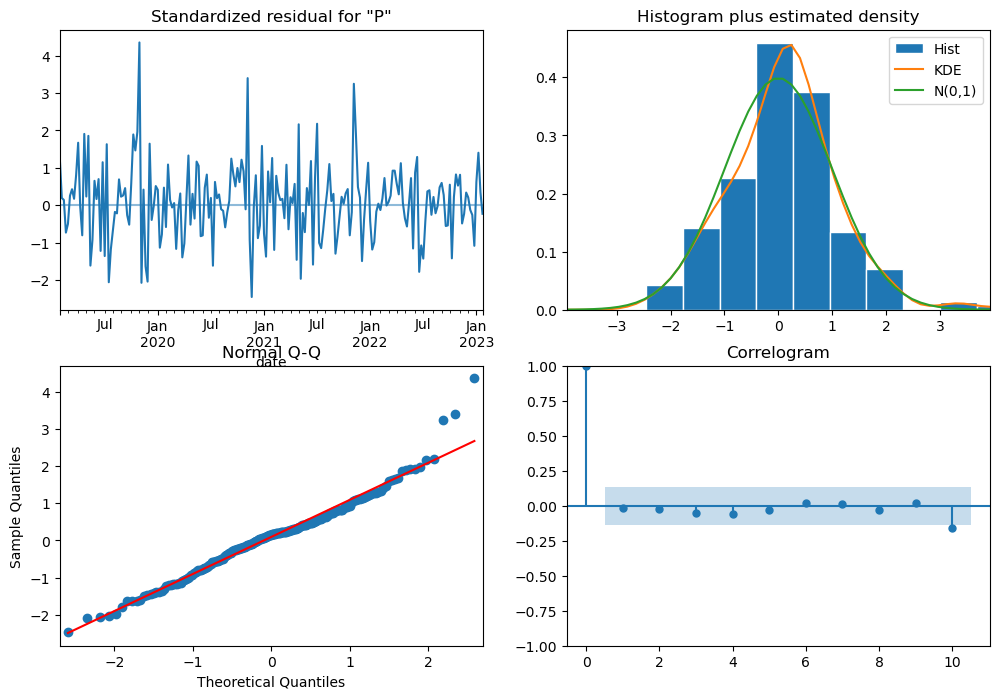

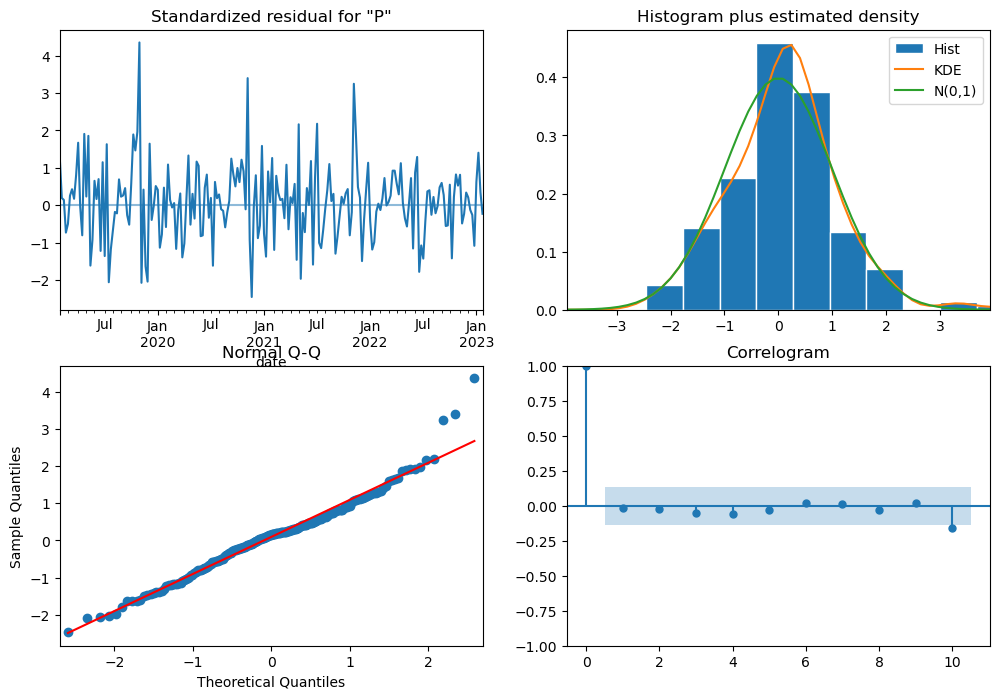

In [100]:
fit8.plot_diagnostics(figsize=(12,8))

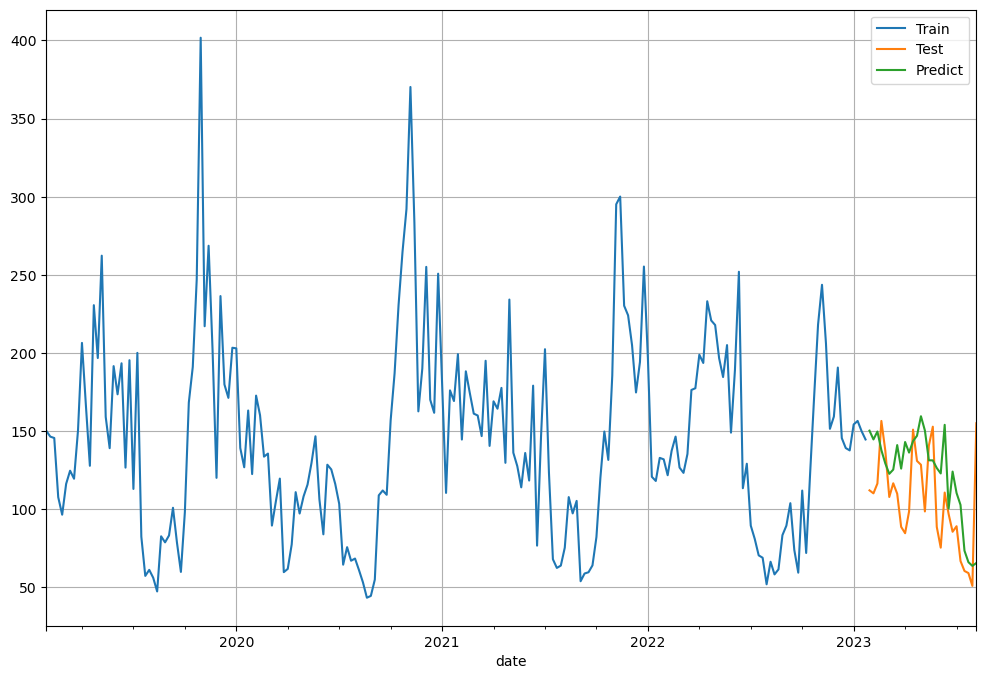

In [101]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred8 = fit8.predict(start=start,end=end,dynamic=False,typ='levels')
train_ts["PM10"].plot(figsize=(12,8), label='Train')
test_ts["PM10"].plot(label='Test')
pred8.plot(label='Predict')
plt.grid()
plt.legend()

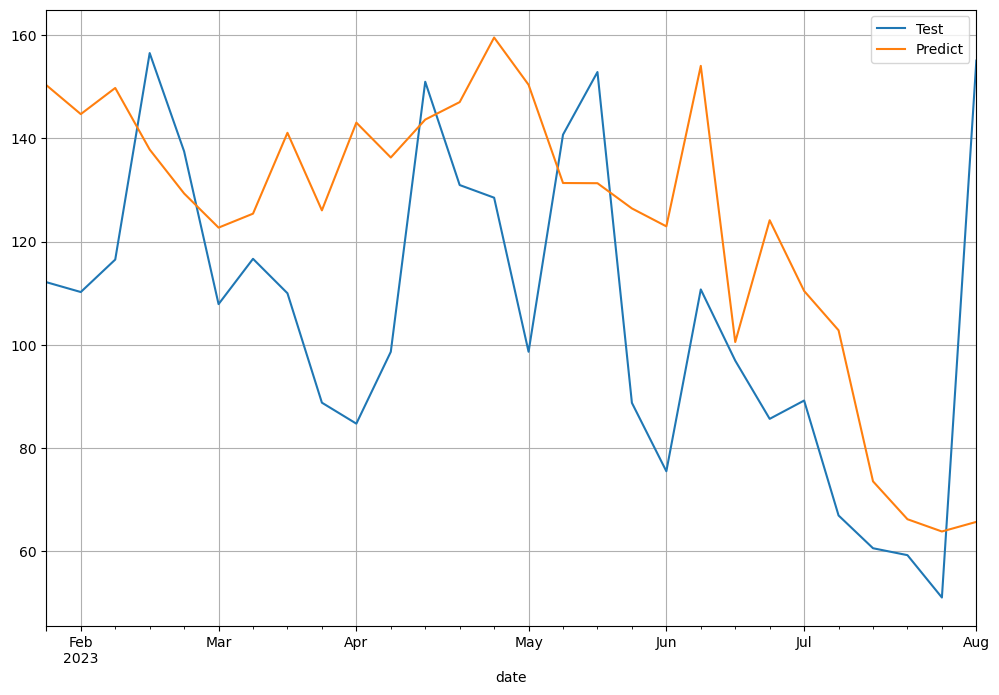

In [102]:
test_ts["PM10"].plot(figsize=(12,8), label='Test')
pred8.plot(label="Predict")
plt.grid()
plt.legend()

In [103]:
mae8=mean_absolute_error(test_ts["PM10"].values,pred8.values)
mae8

28.8558560488817

In [104]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [105]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(final_df_ts['PM10'].values.reshape(-1, 1))

# Split the dataset into training and test sets (80% for training, 20% for testing)
train_size = int(len(normalized_data) * 0.80)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]
# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Set the sequence length for input sequences
sequence_length = 24

# Create input sequences and corresponding labels for the training set
train_x, train_y = create_sequences(train_data, sequence_length)

# Create input sequences and corresponding labels for the test set
test_x, test_y = create_sequences(test_data, sequence_length)

In [106]:
# Build the LSTM model
model9 = Sequential()
model9.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
model9.add(LSTM(50))
model9.add(Dense(1))
model9.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model9.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model9.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 2s 8ms/step - loss: 0.0373
Epoch 2/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 3/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 4/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 5/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 6/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 7/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 8/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0170
Epoch 9/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 10/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 11/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 12/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 13/50
41/41 [==============================

In [107]:
# Make predictions on the test set
pred9 = model9.predict(test_x)

# Denormalize the predicted values
pred9 = scaler.inverse_transform(pred9)

# Print the predicted values
for i in range(len(pred9)):
    print(f"Predicted: {pred9[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")


1/1 [==============================] - 0s 468ms/step
Predicted: [136.23898], Actual: [[137.47358887]]
Predicted: [133.78728], Actual: [[107.85991071]]
Predicted: [120.94593], Actual: [[116.6441115]]
Predicted: [122.16279], Actual: [[109.96679444]]
Predicted: [118.389595], Actual: [[88.75218211]]
Predicted: [105.908905], Actual: [[84.68682496]]
Predicted: [98.81801], Actual: [[98.61360632]]
Predicted: [103.03578], Actual: [[150.97344955]]
Predicted: [133.90305], Actual: [[130.94749523]]
Predicted: [133.68895], Actual: [[128.49450436]]
Predicted: [136.09116], Actual: [[98.62092816]]
Predicted: [121.414024], Actual: [[140.71398214]]
Predicted: [140.4244], Actual: [[152.85673214]]
Predicted: [150.7988], Actual: [[88.72001786]]
Predicted: [120.665565], Actual: [[75.45616508]]
Predicted: [104.209625], Actual: [[110.70652222]]
Predicted: [114.339874], Actual: [[96.90438372]]
Predicted: [107.833824], Actual: [[85.61634801]]
Predicted: [99.22424], Actual: [[89.16675]]
Predicted: [97.54776], Act

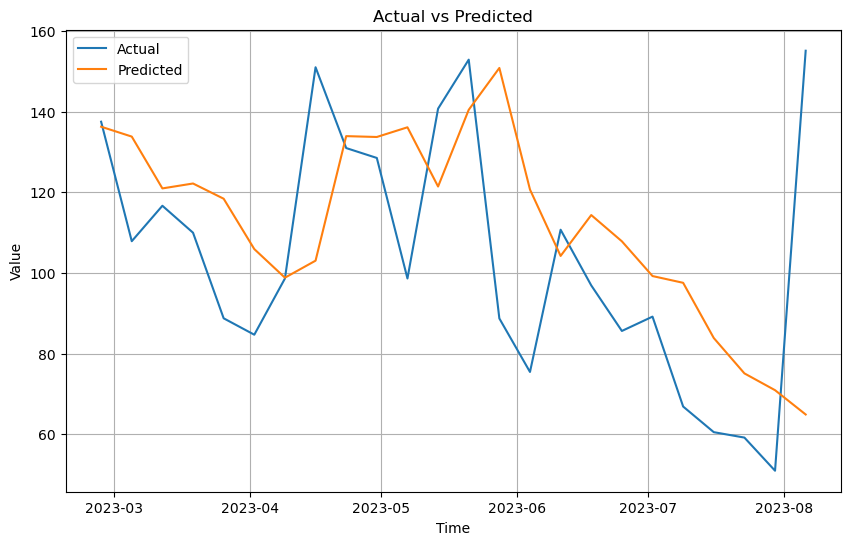

In [108]:
actual_lstm=scaler.inverse_transform(test_y)
time=final_df_ts.index[-24:]
pred_9 = np.array(pred9)
actual_lstm = np.array(actual_lstm)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_lstm, label='Actual')
plt.plot(time,pred_9, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [109]:
mae9=mean_absolute_error(actual_lstm,pred_9)
mae9

23.48064242444252

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, Flatten
from sklearn.metrics import mean_squared_error

In [111]:
model10 = Sequential()
model10.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model10.add(MaxPooling1D(pool_size=2))
model10.add(Flatten())
model10.add(Dense(50, activation='relu'))
model10.add(Dense(1))
model10.compile(loss='mse', optimizer="adam")

# Train the model
model10.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model10.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 5/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 7/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 8/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 9/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 10/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 11/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 12/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 13/50
41/41 [==============================

In [112]:
# Make predictions on the test set
pred10 = model10.predict(test_x)

# Denormalize the predicted values
pred10 = scaler.inverse_transform(pred10)

# Print the predicted values
for i in range(len(pred10)):
    print(f"Predicted: {pred10[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

1/1 [==============================] - 0s 50ms/step
Predicted: [110.59421], Actual: [[137.47358887]]
Predicted: [134.95833], Actual: [[107.85991071]]
Predicted: [157.57025], Actual: [[116.6441115]]
Predicted: [134.0129], Actual: [[109.96679444]]
Predicted: [109.933136], Actual: [[88.75218211]]
Predicted: [87.08122], Actual: [[84.68682496]]
Predicted: [92.349724], Actual: [[98.61360632]]
Predicted: [99.54154], Actual: [[150.97344955]]
Predicted: [96.72505], Actual: [[130.94749523]]
Predicted: [87.310196], Actual: [[128.49450436]]
Predicted: [92.804665], Actual: [[98.62092816]]
Predicted: [125.04374], Actual: [[140.71398214]]
Predicted: [100.39825], Actual: [[152.85673214]]
Predicted: [94.00183], Actual: [[88.72001786]]
Predicted: [114.38114], Actual: [[75.45616508]]
Predicted: [94.22308], Actual: [[110.70652222]]
Predicted: [79.603676], Actual: [[96.90438372]]
Predicted: [69.63556], Actual: [[85.61634801]]
Predicted: [78.002785], Actual: [[89.16675]]
Predicted: [67.20516], Actual: [[66.

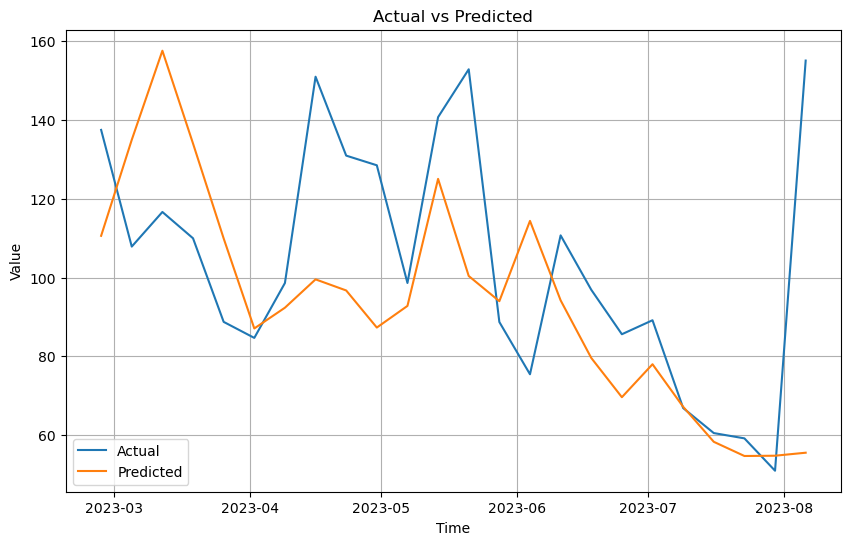

In [113]:
actual_cnn=scaler.inverse_transform(test_y)
pred_10 = np.array(pred10)
actual_cnn = np.array(actual_cnn)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_cnn, label='Actual')
plt.plot(time,pred_10, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()


In [114]:
mae10=mean_absolute_error(actual_cnn,pred_10)
print(mae10)

23.543946132647296


# NO2 - TS

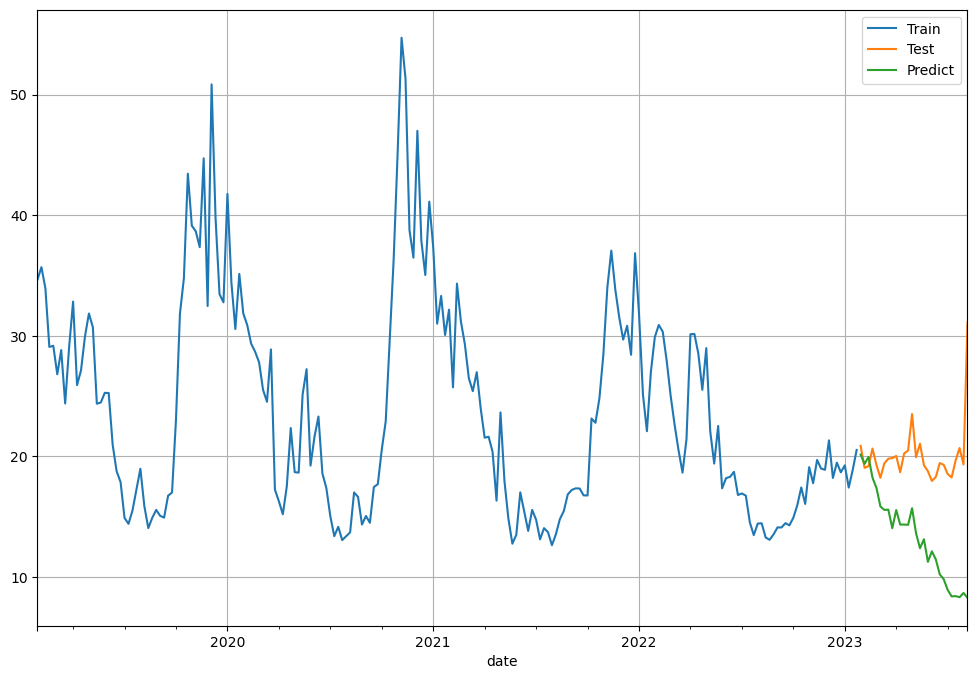

In [115]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model11 = ExponentialSmoothing(train_ts['NO2'],trend='mul',seasonal='mul',
                              initialization_method='estimated',seasonal_periods=52)
fit11 = model11.fit()
pred11=fit11.forecast(28)
train_ts["NO2"].plot(figsize=(12,8), label='Train')
test_ts["NO2"].plot(label='Test')
pred11.plot(label='Predict')
plt.grid()
plt.legend()

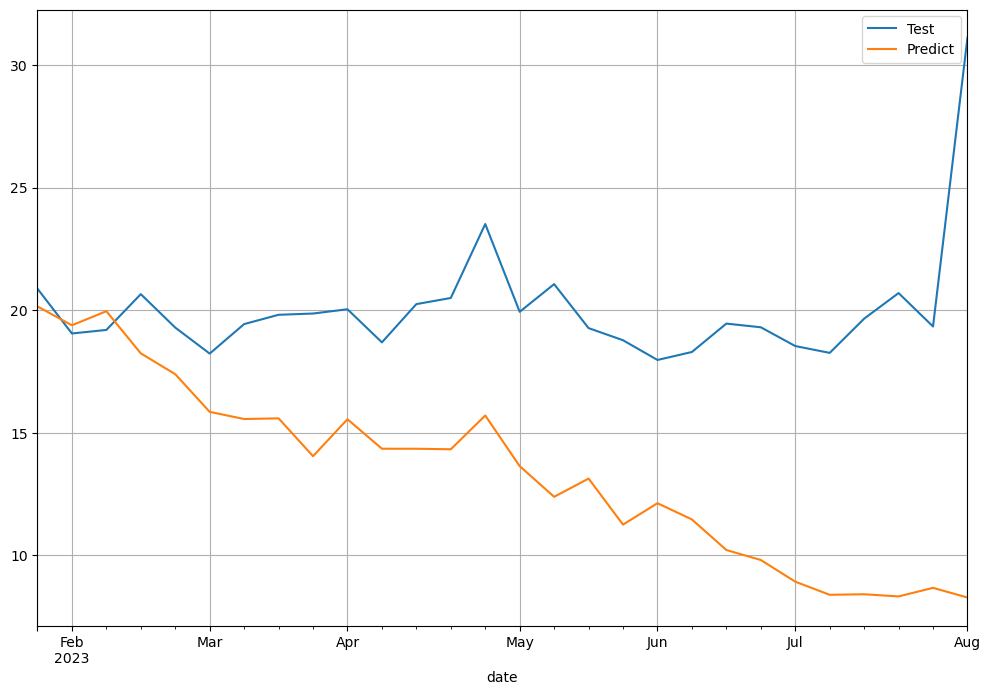

In [116]:
test_ts["NO2"].plot(figsize=(12,8), label='Test')
pred11.plot(label="Predict")
plt.grid()
plt.legend()

In [117]:
mae11=mean_absolute_error(test_ts["NO2"].values,pred11.values)
mae11

6.704793989031067

In [118]:
from pmdarima import auto_arima
arima3 = auto_arima(test_ts['NO2'],start_p=0,start_q=0,max_p=3,max_q=3,seasonal=False,trace=True,
                         error_action='ignore',suppress_warnings=True)
arima3.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=249.718, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=221.529, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=141.805, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=142.699, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=142.473, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=145.284, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=136.227, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=134.509, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132.607, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=134.428, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.350 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:                        SARIMAX   Log Likelihood                 -64.303
Date:                Sun, 20 Aug 2023   AIC                            132.607
Time:                        12:44:15   BIC                            135.271
Sample:                    01-29-2023   HQIC                           133.421
                         - 08-06-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.0342      1.030     19.460      0.000      18.016      22.052
sigma2         5.7847      1.265      4.573      0.000       3.305       8.264
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               264.76
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              18.92   Skew:                             3.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
model12 = ARIMA(train_ts['NO2'],order=(0,0,0))
fit12 = model12.fit()
fit12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    NO2   No. Observations:                  208
Model:                          ARIMA   Log Likelihood                -747.787
Date:                Sun, 20 Aug 2023   AIC                           1499.574
Time:                        12:44:25   BIC                           1506.249
Sample:                    02-03-2019   HQIC                          1502.273
                         - 01-22-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8079      0.747     31.892      0.000      22.345      25.271
sigma2        77.6631      8.610      9.020      0.000      60.787      94.539
===================================================================================
Ljung-Box (L1) (Q):                 167.32   Jarque-Bera (JB):                27.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.88
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

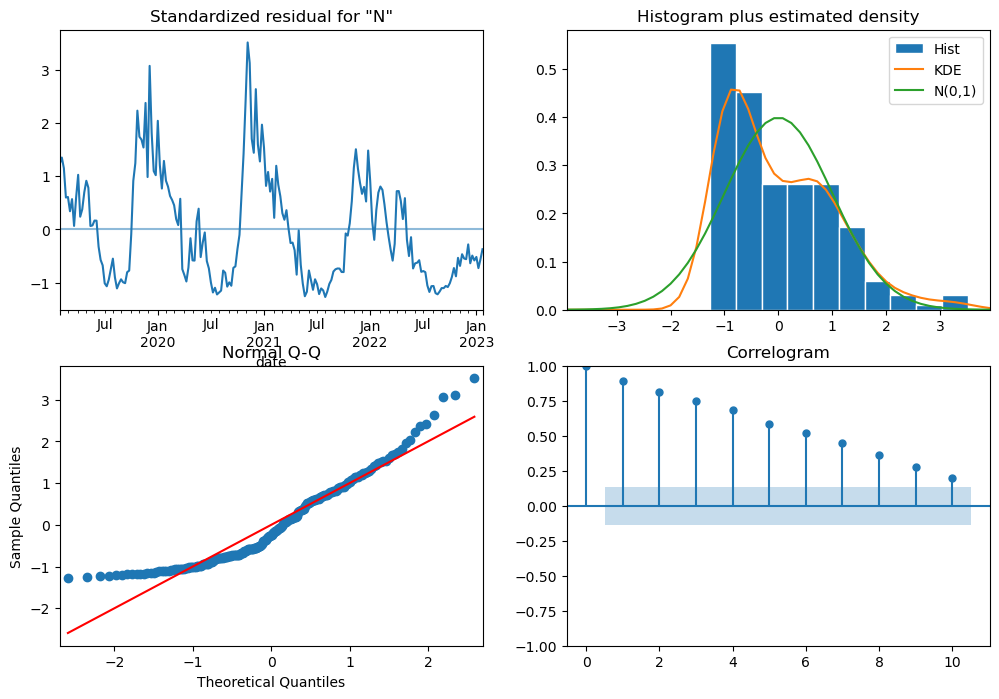

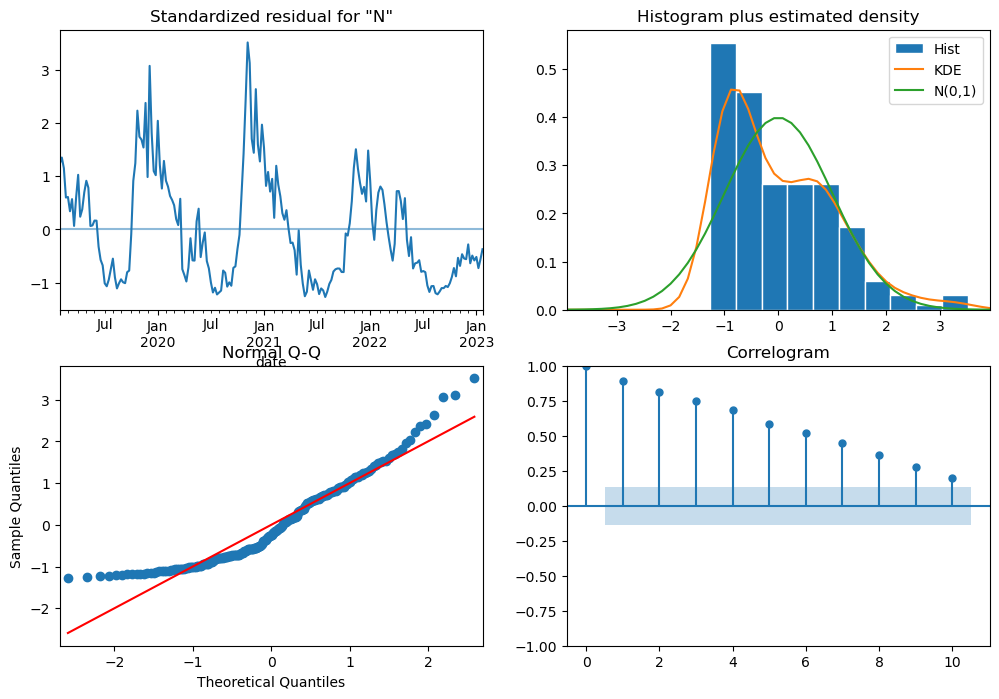

In [120]:
fit12.plot_diagnostics(figsize=(12,8))

In [121]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred12 = fit12.predict(start=start,end=end,dynamic=False,typ='levels')
for i in range(len(pred12)):
    print(f"predicted = {pred12[i]}, actual = {test_ts['NO2'][i]}")

predicted = 23.80786144092285, actual = 20.87232142857143
predicted = 23.80786144092285, actual = 19.046664937615272
predicted = 23.80786144092285, actual = 19.19100844665911
predicted = 23.80786144092285, actual = 20.650446428571428
predicted = 23.80786144092285, actual = 19.286990589516254
predicted = 23.80786144092285, actual = 18.226339285714285
predicted = 23.80786144092285, actual = 19.429761040236205
predicted = 23.80786144092285, actual = 19.808807794758128
predicted = 23.80786144092285, actual = 19.860170790697286
predicted = 23.80786144092285, actual = 20.034099362125858
predicted = 23.80786144092285, actual = 18.684820464746796
predicted = 23.80786144092285, actual = 20.244322094499257
predicted = 23.80786144092285, actual = 20.49472954928005
predicted = 23.80786144092285, actual = 23.51118961166478
predicted = 23.80786144092285, actual = 19.930115589516255
predicted = 23.80786144092285, actual = 21.059285714285714
predicted = 23.80786144092285, actual = 19.265267857142856
p

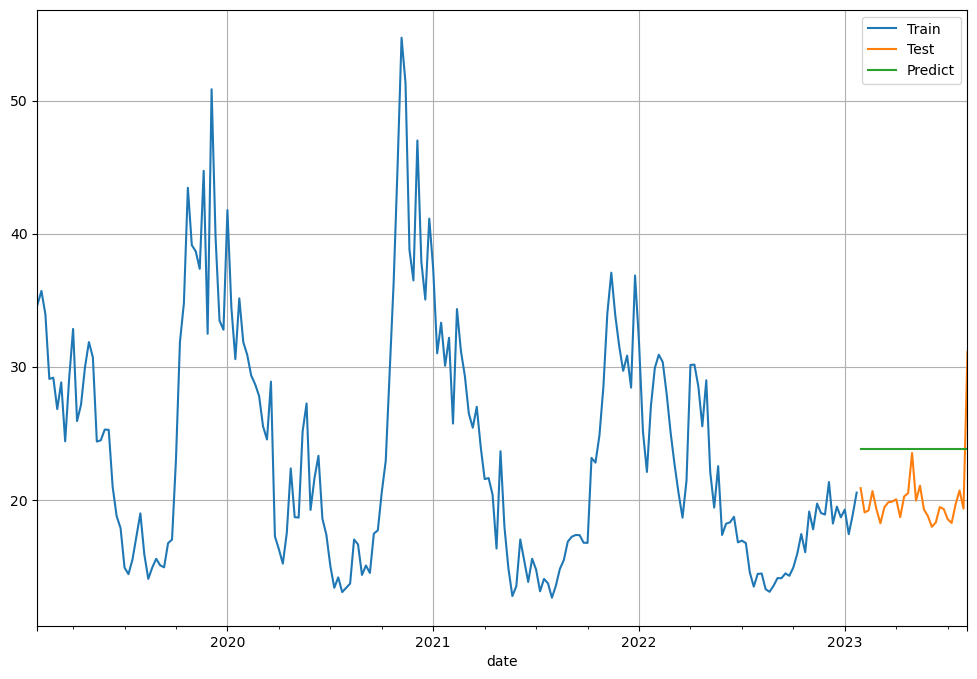

In [122]:
train_ts["NO2"].plot(figsize=(12,8), label='Train')
test_ts["NO2"].plot(label='Test')
pred12.plot(label='Predict')
plt.grid()
plt.legend()

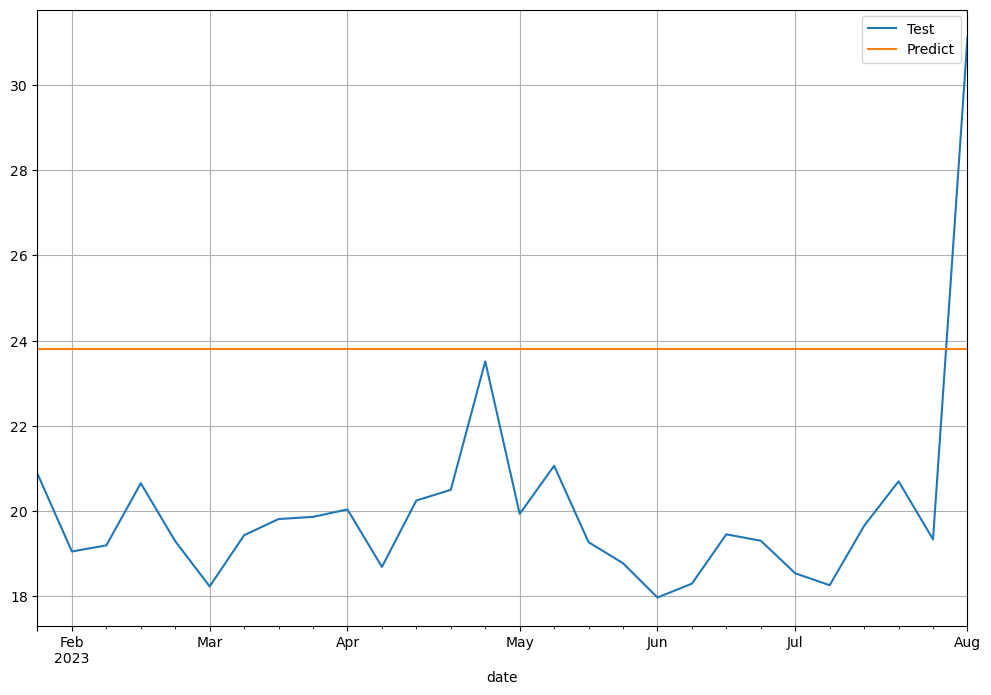

In [123]:
test_ts["NO2"].plot(figsize=(12,8), label='Test')
pred12.plot(label="Predict")
plt.grid()
plt.legend()

In [124]:
mae12=mean_absolute_error(test_ts["NO2"].values,pred12.values)
mae12

4.295778708419473

In [125]:
sarima3 = auto_arima(train_ts['NO2'],start_p=0,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=52,
                          seasonal=True,trace=True,stepwise=True,
           error_action='ignore',suppress_warnings=True)
sarima3.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1171.342, Time=0.26 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1163.063, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1161.504, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1169.401, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1167.374, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=1163.349, Time=1.36 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=1163.482, Time=2.89 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=1161.395, Time=0.51 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=1163.391, Time=2.48 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=1165.395, Time=3.00 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=1167.915, Time=0.38 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=1162.602, Time=0.88 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=1162.376, Time=0.68 sec
 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=1165.395, Time=0.99 sec
 ARIMA(0,1,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  208
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood                -576.739
Date:                             Sun, 20 Aug 2023   AIC                           1159.479
Time:                                     12:45:25   BIC                           1169.477
Sample:                                 02-03-2019   HQIC                          1163.522
                                      - 01-22-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2244      0.046     -4.905      0.000      -0.314      -0.135
ar.S.L52       0.2247      0.065      3.475      0.001       0.098       0.351
sigma2        15.1989      1.033     14.715      0.000      13.174      17.223
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                52.41
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model13 = SARIMAX(train_ts['NO2'],order=(0,1,1),seasonal_order=(1,0,0,52))
fit13 = model13.fit()
fit13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 NO2   No. Observations:                  208
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood                -576.739
Date:                             Sun, 20 Aug 2023   AIC                           1159.479
Time:                                     12:45:32   BIC                           1169.477
Sample:                                 02-03-2019   HQIC                          1163.522
                                      - 01-22-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2244      0.046     -4.905      0.000      -0.314      -0.135
ar.S.L52       0.2247      0.065      3.475      0.001       0.098       0.351
sigma2        15.1989      1.033     14.715      0.000      13.174      17.223
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                52.41
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

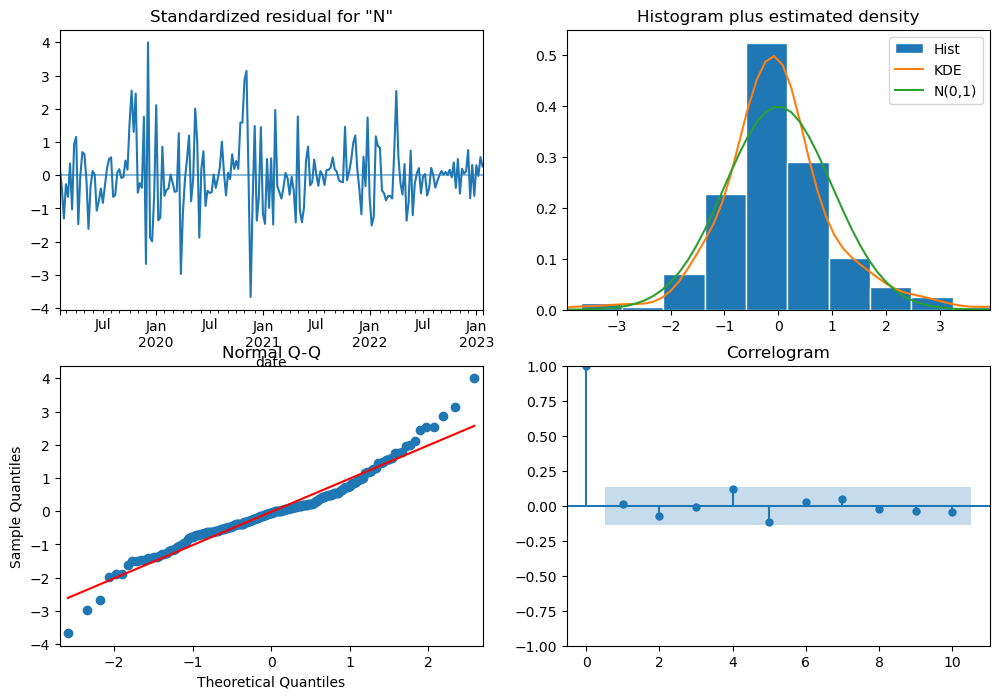

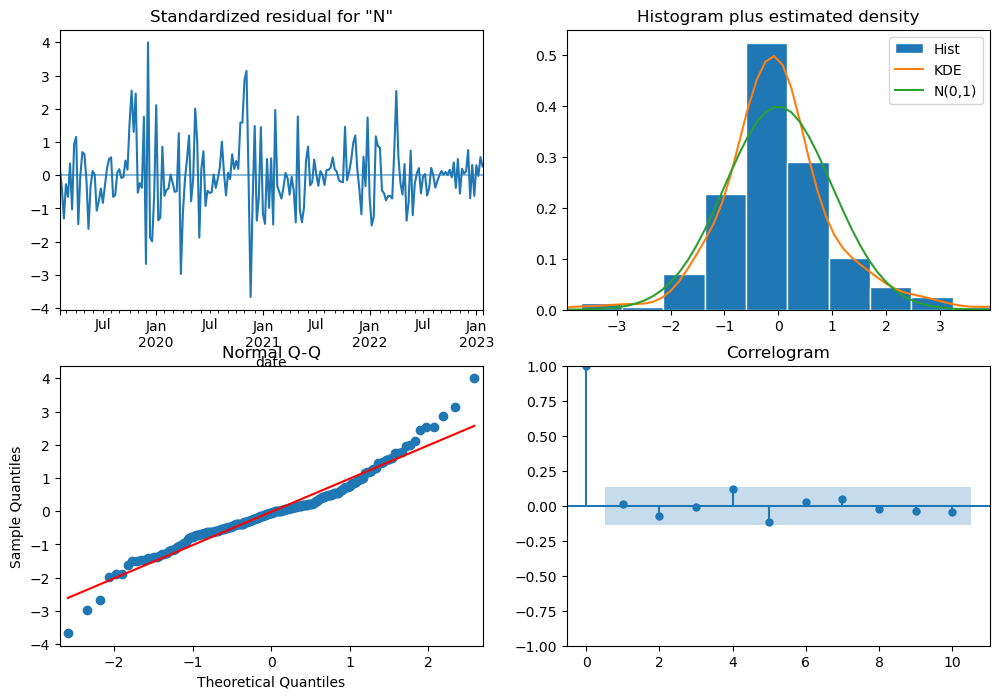

In [127]:
fit13.plot_diagnostics(figsize=(12,8))

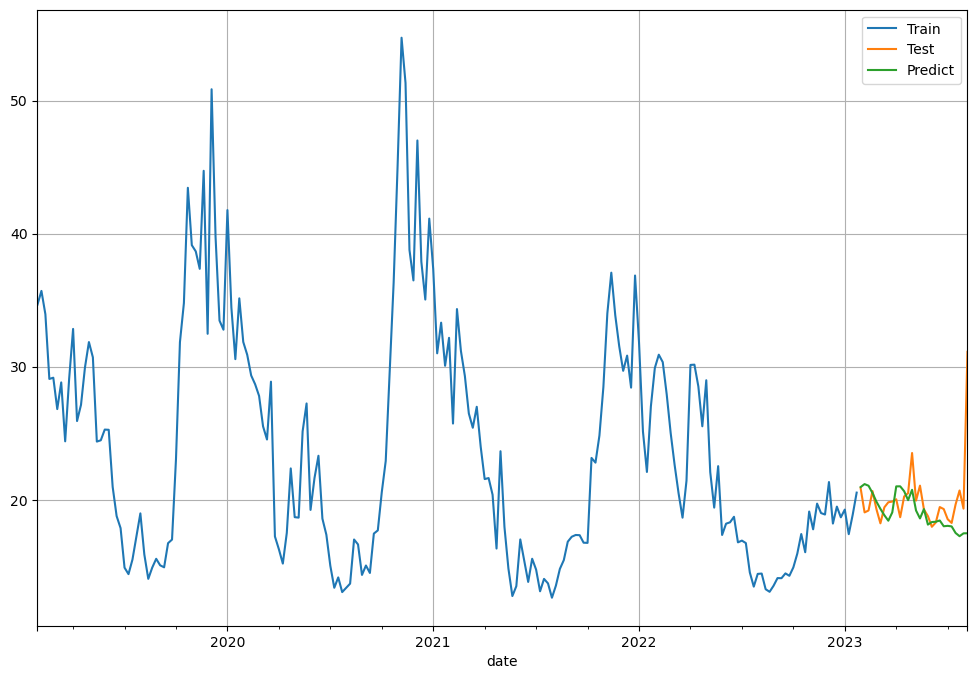

In [128]:
start = len(train_ts)
end = len(train_ts) + len(test_ts) - 1
pred13 = fit13.predict(start=start,end=end,dynamic=False,typ='levels')
train_ts["NO2"].plot(figsize=(12,8), label='Train')
test_ts["NO2"].plot(label='Test')
pred13.plot(label='Predict')
plt.grid()
plt.legend()

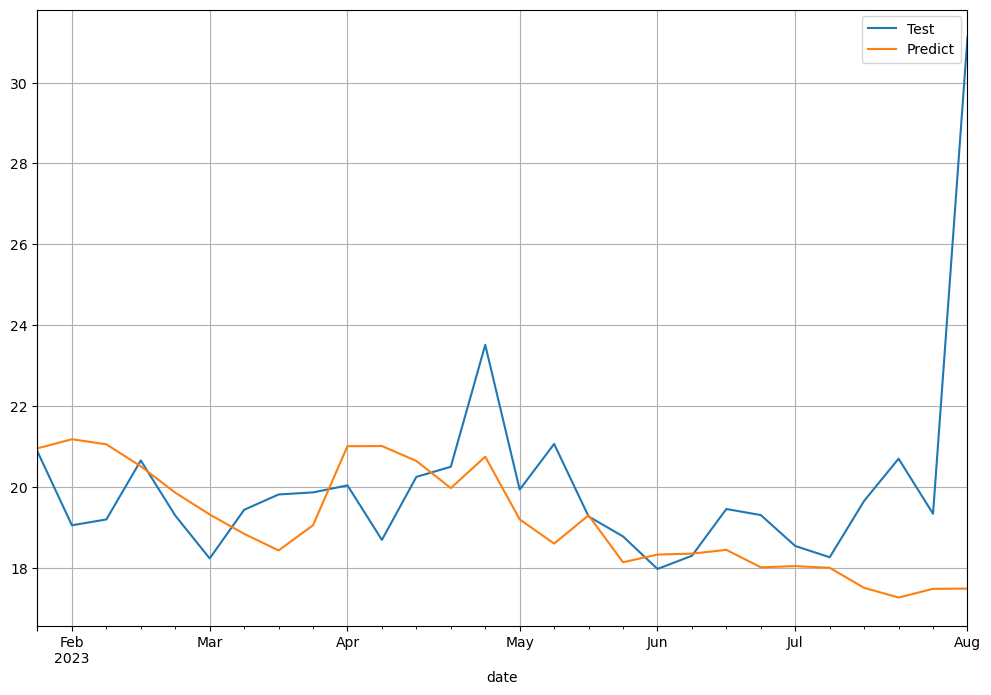

In [129]:
test_ts["NO2"].plot(figsize=(12,8), label='Test')
pred13.plot(label="Predict")
plt.grid()
plt.legend()

In [130]:
mae13=mean_absolute_error(test_ts["NO2"].values,pred13.values)
mae13

1.5737211983180244

In [131]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [132]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(final_df_ts['NO2'].values.reshape(-1, 1))

# Split the dataset into training and test sets (80% for training, 20% for testing)
train_size = int(len(normalized_data) * 0.80)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]
# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Set the sequence length for input sequences
sequence_length = 24

# Create input sequences and corresponding labels for the training set
train_x, train_y = create_sequences(train_data, sequence_length)

# Create input sequences and corresponding labels for the test set
test_x, test_y = create_sequences(test_data, sequence_length)

In [133]:
# Build the LSTM model
model14 = Sequential()
model14.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
model14.add(LSTM(50))
model14.add(Dense(1))
model14.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model14.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model14.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 2s 8ms/step - loss: 0.0340
Epoch 2/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 3/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 4/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0195
Epoch 5/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 6/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 7/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 8/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0133
Epoch 9/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 10/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 11/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 12/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 13/50
41/41 [==============================

In [134]:
# Make predictions on the test set
pred14 = model14.predict(test_x)

# Denormalize the predicted values
pred14 = scaler.inverse_transform(pred14)

# Print the predicted values
for i in range(len(pred14)):
    print(f"Predicted: {pred14[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

1/1 [==============================] - 0s 484ms/step
Predicted: [21.182117], Actual: [[19.28699059]]
Predicted: [20.431038], Actual: [[18.22633929]]
Predicted: [19.373955], Actual: [[19.42976104]]
Predicted: [20.184994], Actual: [[19.80880779]]
Predicted: [20.854368], Actual: [[19.86017079]]
Predicted: [21.05609], Actual: [[20.03409936]]
Predicted: [21.19208], Actual: [[18.68482046]]
Predicted: [20.073603], Actual: [[20.24432209]]
Predicted: [21.063328], Actual: [[20.49472955]]
Predicted: [21.596888], Actual: [[23.51118961]]
Predicted: [24.226713], Actual: [[19.93011559]]
Predicted: [21.655767], Actual: [[21.05928571]]
Predicted: [21.874125], Actual: [[19.26526786]]
Predicted: [20.60113], Actual: [[18.77080357]]
Predicted: [19.959816], Actual: [[17.96583247]]
Predicted: [19.24237], Actual: [[18.29172533]]
Predicted: [19.355148], Actual: [[19.44961137]]
Predicted: [20.374098], Actual: [[19.29925422]]
Predicted: [20.508993], Actual: [[18.53455357]]
Predicted: [19.760836], Actual: [[18.25

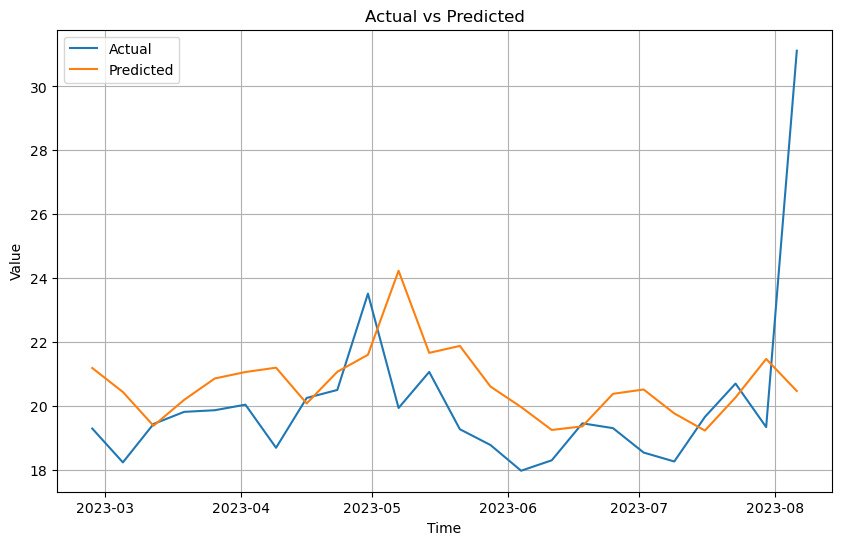

In [135]:
actual_lstm=scaler.inverse_transform(test_y)
time=final_df_ts.index[-24:]
pred_14 = np.array(pred14)
actual_lstm = np.array(actual_lstm)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_lstm, label='Actual')
plt.plot(time,pred_14, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [136]:
mae14=mean_absolute_error(actual_lstm,pred_14)
mae14

1.7619126691847364

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, Flatten
from sklearn.metrics import mean_squared_error

In [138]:
model15 = Sequential()
model15.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model15.add(MaxPooling1D(pool_size=2))
model15.add(Flatten())
model15.add(Dense(50, activation='relu'))
model15.add(Dense(1))
model15.compile(loss='mse', optimizer="adam")

# Train the model
model15.fit(train_x, train_y, epochs=50, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss = model15.evaluate(test_x, test_y, verbose=0)

Epoch 1/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0365
Epoch 2/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 3/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 4/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 5/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 6/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 7/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 8/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 9/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 10/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 11/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 12/50
41/41 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 13/50
41/41 [==============================

In [139]:
# Make predictions on the test set
pred15 = model15.predict(test_x)

# Denormalize the predicted values
pred15 = scaler.inverse_transform(pred15)

# Print the predicted values
for i in range(len(pred15)):
    print(f"Predicted: {pred15[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

1/1 [==============================] - 0s 52ms/step
Predicted: [19.379253], Actual: [[19.28699059]]
Predicted: [18.95388], Actual: [[18.22633929]]
Predicted: [19.776602], Actual: [[19.42976104]]
Predicted: [20.007689], Actual: [[19.80880779]]
Predicted: [19.639145], Actual: [[19.86017079]]
Predicted: [20.170626], Actual: [[20.03409936]]
Predicted: [20.340342], Actual: [[18.68482046]]
Predicted: [20.239223], Actual: [[20.24432209]]
Predicted: [18.26149], Actual: [[20.49472955]]
Predicted: [19.467243], Actual: [[23.51118961]]
Predicted: [20.14975], Actual: [[19.93011559]]
Predicted: [21.037874], Actual: [[21.05928571]]
Predicted: [19.657742], Actual: [[19.26526786]]
Predicted: [20.312187], Actual: [[18.77080357]]
Predicted: [20.487646], Actual: [[17.96583247]]
Predicted: [19.40567], Actual: [[18.29172533]]
Predicted: [19.012001], Actual: [[19.44961137]]
Predicted: [19.18879], Actual: [[19.29925422]]
Predicted: [18.41089], Actual: [[18.53455357]]
Predicted: [18.685345], Actual: [[18.25491

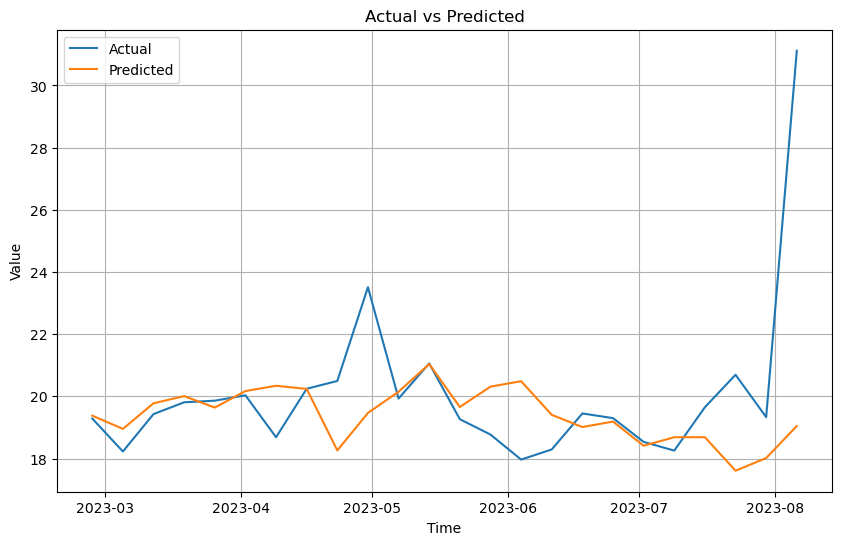

In [140]:
actual_cnn=scaler.inverse_transform(test_y)
pred_15 = np.array(pred15)
actual_cnn = np.array(actual_cnn)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_cnn, label='Actual')
plt.plot(time,pred_15, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [141]:
mae15=mean_absolute_error(actual_cnn,pred_15)
print(mae15)

1.4171438494587196


# Regression

In [17]:
final_df_reg

PM2_5        PM10         NO2         RH        WS          WD
0       98.550000  156.890000   47.700000  81.790000  2.600000  226.990000
1       93.920000  141.840000   31.690000  92.900000  2.370000  285.440000
2       71.620000  150.170000   29.180000  94.310000  1.910000  273.560000
3       65.470000  179.270000   45.330000  79.540000  1.550000  247.090000
4      169.060000  393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...         ...        ...       ...         ...
26268   21.490000   35.460000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   35.930000   27.450000  77.412000  2.286000  190.746000
26270   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26271   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26272         NaN         NaN         NaN        NaN       NaN         NaN

[26273 rows x 6 columns]

In [18]:
final_df_reg.isnull().sum()

PM2_5    1
PM10     1
NO2      1
RH       1
WS       1
WD       1
dtype: int64

In [19]:
final_df_reg.dropna(inplace=True)
final_df_reg.isnull().sum()

PM2_5    0
PM10     0
NO2      0
RH       0
WS       0
WD       0
dtype: int64

          PM2_5      PM10       NO2        RH        WS        WD
PM2_5  1.000000  0.792311  0.385966 -0.133805 -0.007064  0.127543
PM10   0.792311  1.000000  0.365031 -0.339527  0.031437  0.161486
NO2    0.385966  0.365031  1.000000 -0.060508 -0.013693  0.097067
RH    -0.133805 -0.339527 -0.060508  1.000000 -0.118339 -0.221910
WS    -0.007064  0.031437 -0.013693 -0.118339  1.000000  0.093085
WD     0.127543  0.161486  0.097067 -0.221910  0.093085  1.000000


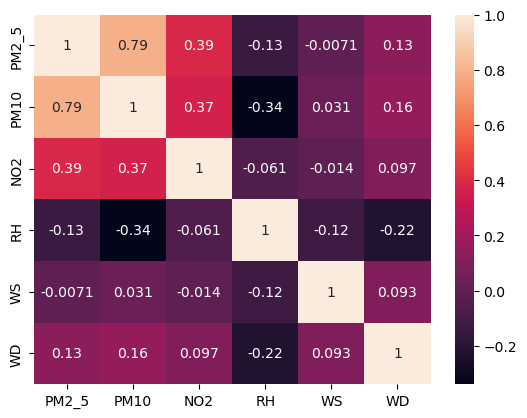

In [20]:
corr_df=final_df_reg.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,annot=True)
plt.show()

# PM 2.5 - Reg

In [26]:
x1=final_df_reg.iloc[:,1:]
print(x1)
y1=final_df_reg.iloc[:,0]
print(y1)

             PM10         NO2         RH        WS          WD
0      156.890000   47.700000  81.790000  2.600000  226.990000
1      141.840000   31.690000  92.900000  2.370000  285.440000
2      150.170000   29.180000  94.310000  1.910000  273.560000
3      179.270000   45.330000  79.540000  1.550000  247.090000
4      393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...        ...       ...         ...
26267   57.920000   19.082000  79.058000  1.870000  184.032000
26268   35.460000   25.530000  73.206000  3.358000  170.802000
26269   35.930000   27.450000  77.412000  2.286000  190.746000
26270  140.370488   23.313237  64.357624  2.409814  194.269765
26271  140.370488   23.313237  64.357624  2.409814  194.269765

[26272 rows x 5 columns]
0         98.550000
1         93.920000
2         71.620000
3         65.470000
4        169.060000
            ...    
26267     35.110000
26268     21.490000
26269     21.770000
26270     65.164654
26271     65.16465

In [27]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=3,test_size=0.2)
x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape

((21017, 5), (21017,), (5255, 5), (5255,))

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm1=LinearRegression()
lm1.fit(x_train1,y_train1)

LinearRegression()

In [30]:
print (lm1.intercept_)
print (lm1.coef_)

-26.27175946050727
[ 0.440454    0.26640258  0.32171645 -0.26813171  0.01675178]


In [31]:
y_pred1=lm1.predict(x_test1)

In [32]:
pred_df1=pd.DataFrame()
pred_df1

Empty DataFrame
Columns: []
Index: []

In [33]:
pred_df1["Actual_PM2_5"]=y_test1
pred_df1["Predicted_PM2_5"]=y_pred1
pred_df1

Actual_PM2_5  Predicted_PM2_5
332          122.01        98.008447
4324          59.83        70.059645
13540         48.61        36.796672
9914         108.56       124.781843
23524         10.75        14.509348
...             ...              ...
10035         19.65        27.963446
2117          40.35        44.159894
23177         24.80        24.566774
7130          33.90        28.060167
10739         82.09        98.398982

[5255 rows x 2 columns]

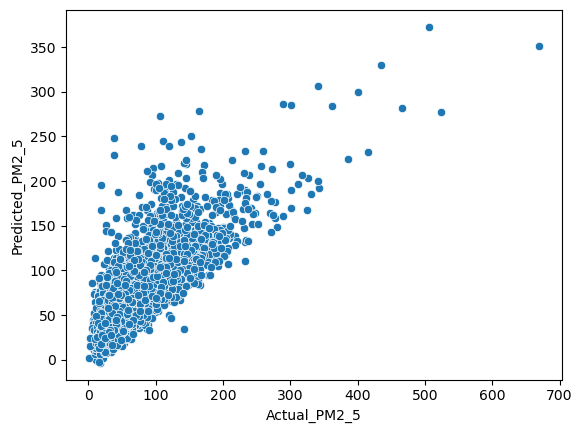

In [34]:
sns.scatterplot(x=pred_df1["Actual_PM2_5"],y=pred_df1["Predicted_PM2_5"])
plt.show()

In [36]:
lm1.score(x_train1,y_train1)

0.6587749814423861

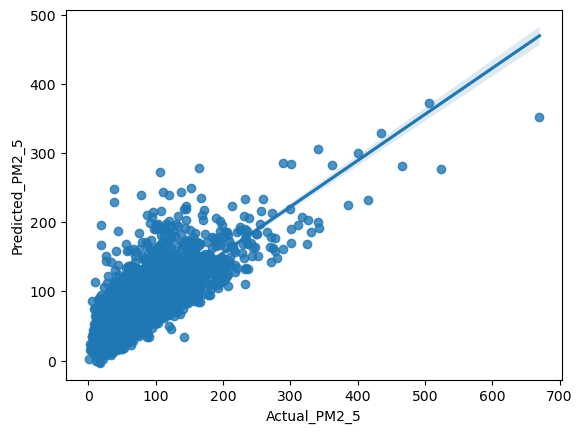

In [37]:
sns.regplot(x=pred_df1["Actual_PM2_5"],y=pred_df1["Predicted_PM2_5"])
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(pred_df1['Actual_PM2_5'],pred_df1['Predicted_PM2_5']))
print(rmse1)

27.89736028598196


In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

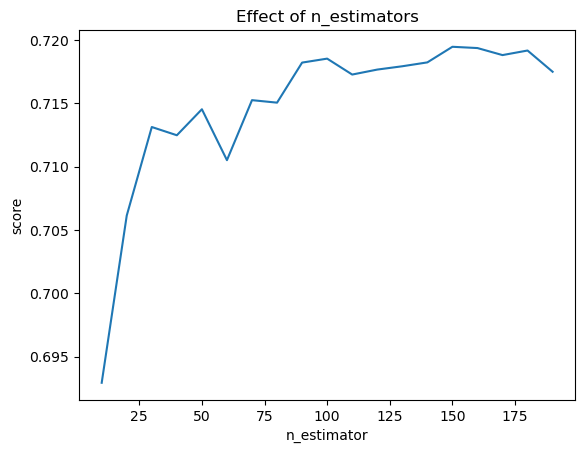

In [41]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train1, y_train1)
    scores.append(model.score(x_test1, y_test1))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [42]:
rf1=RandomForestRegressor(n_jobs=-1,n_estimators=170,random_state = 42)
rf1.fit(x_train1,y_train1)

RandomForestRegressor(n_estimators=170, n_jobs=-1, random_state=42)

In [43]:
rf1.score(x_train1,y_train1)

0.9600550436360082

In [44]:
y_pred2=rf1.predict(x_test1)
pred_df2=pd.DataFrame()
pred_df2["Actual_PM2_5"]=y_test1
pred_df2["Predicted_PM2_5"]=y_pred2
pred_df2

Actual_PM2_5  Predicted_PM2_5
332          122.01       109.898812
4324          59.83        73.369765
13540         48.61        31.754588
9914         108.56       106.636471
23524         10.75        15.020682
...             ...              ...
10035         19.65        17.375647
2117          40.35        56.173882
23177         24.80        22.589600
7130          33.90        22.146765
10739         82.09        82.039294

[5255 rows x 2 columns]

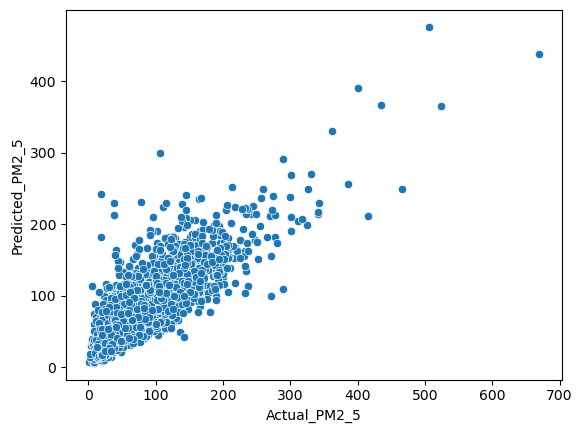

In [45]:
sns.scatterplot(x=pred_df2["Actual_PM2_5"],y=pred_df2["Predicted_PM2_5"])
plt.show()

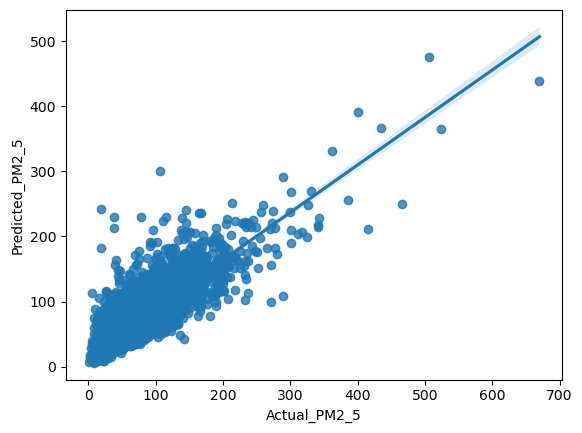

In [46]:
sns.regplot(x=pred_df2["Actual_PM2_5"],y=pred_df2["Predicted_PM2_5"])
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
rmse2=np.sqrt(mean_squared_error(pred_df2['Actual_PM2_5'],pred_df2['Predicted_PM2_5']))
print(rmse2)

25.2099024407347


# PM 10 - Reg

In [60]:
final_df_reg

PM2_5        PM10         NO2         RH        WS          WD
0       98.550000  156.890000   47.700000  81.790000  2.600000  226.990000
1       93.920000  141.840000   31.690000  92.900000  2.370000  285.440000
2       71.620000  150.170000   29.180000  94.310000  1.910000  273.560000
3       65.470000  179.270000   45.330000  79.540000  1.550000  247.090000
4      169.060000  393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...         ...        ...       ...         ...
26267   35.110000   57.920000   19.082000  79.058000  1.870000  184.032000
26268   21.490000   35.460000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   35.930000   27.450000  77.412000  2.286000  190.746000
26270   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26271   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765

[26272 rows x 6 columns]

In [61]:
x2=final_df_reg.iloc[:,[0,2,3,4,5]]
print(x2)
y2=final_df_reg.iloc[:,1]
print(y2)

            PM2_5         NO2         RH        WS          WD
0       98.550000   47.700000  81.790000  2.600000  226.990000
1       93.920000   31.690000  92.900000  2.370000  285.440000
2       71.620000   29.180000  94.310000  1.910000  273.560000
3       65.470000   45.330000  79.540000  1.550000  247.090000
4      169.060000  103.210000  67.890000  2.020000  104.340000
...           ...         ...        ...       ...         ...
26267   35.110000   19.082000  79.058000  1.870000  184.032000
26268   21.490000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   27.450000  77.412000  2.286000  190.746000
26270   65.164654   23.313237  64.357624  2.409814  194.269765
26271   65.164654   23.313237  64.357624  2.409814  194.269765

[26272 rows x 5 columns]
0        156.890000
1        141.840000
2        150.170000
3        179.270000
4        393.600000
            ...    
26267     57.920000
26268     35.460000
26269     35.930000
26270    140.370488
26271    140.37048

In [62]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=3,test_size=0.2)
x_train2.shape,y_train2.shape,x_test2.shape,y_test2.shape

((21017, 5), (21017,), (5255, 5), (5255,))

In [63]:
from sklearn.linear_model import LinearRegression
lm2=LinearRegression()
lm2.fit(x_train2,y_train2)
print (lm2.intercept_)
print (lm2.coef_)

102.87892959504448
[ 1.3374056   0.31754501 -0.92486877  0.28861246  0.01003392]


In [64]:
y_pred3=lm2.predict(x_test2)
pred_df3=pd.DataFrame()
pred_df3["Actual_PM10"]=y_test2
pred_df3["Predicted_PM10"]=y_pred3
pred_df3

Actual_PM10  Predicted_PM10
332         156.10      201.772756
4324        133.48      132.466266
13540        60.82       85.560031
9914        291.05      237.456634
23524        24.35       44.332960
...            ...             ...
10035        56.61       57.156637
2117        120.66      160.034494
23177        53.03       72.225131
7130         43.90       75.288490
10739       230.61      190.398885

[5255 rows x 2 columns]

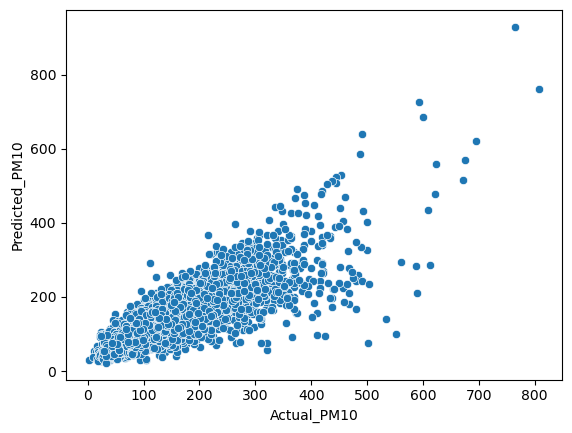

In [65]:
sns.scatterplot(x=pred_df3["Actual_PM10"],y=pred_df3["Predicted_PM10"])
plt.show()

In [66]:
lm2.score(x_train2,y_train2)

0.6887595568498212

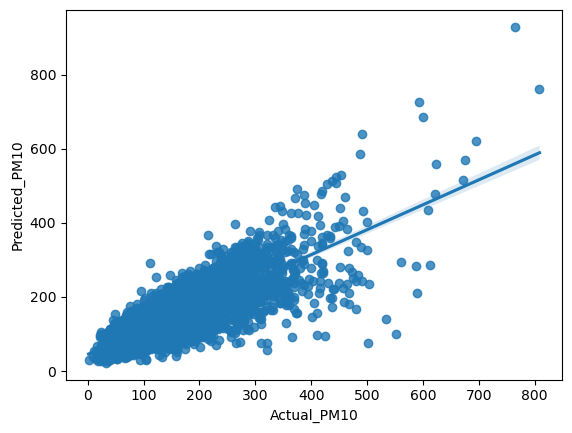

In [67]:
sns.regplot(x=pred_df3["Actual_PM10"],y=pred_df3["Predicted_PM10"])
plt.show()

In [68]:
rmse3=np.sqrt(mean_squared_error(pred_df3['Actual_PM10'],pred_df3['Predicted_PM10']))
print(rmse3)

49.625117137461196


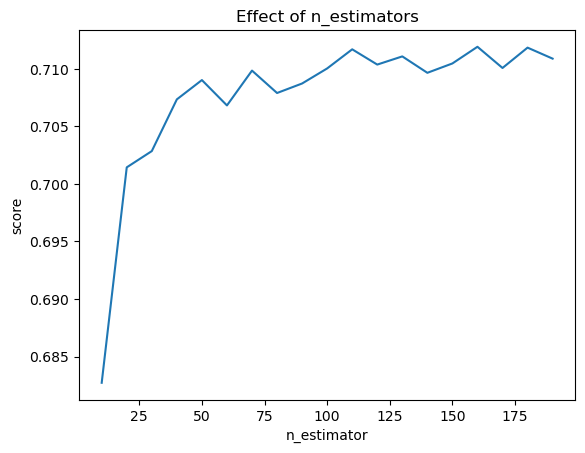

In [59]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train2, y_train2)
    scores.append(model.score(x_test2, y_test2))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [69]:
rf2=RandomForestRegressor(n_jobs=-1,n_estimators=180,random_state = 42)
rf2.fit(x_train2,y_train2)
rf2.score(x_train2,y_train2)

0.9612456381016301

In [72]:
y_pred4=rf2.predict(x_test2)
pred_df4=pd.DataFrame()
pred_df4["Actual_PM10"]=y_test2
pred_df4["Predicted_PM10"]=y_pred4
pred_df4

Actual_PM10  Predicted_PM10
332         156.10      177.161278
4324        133.48      112.461278
13540        60.82      101.321944
9914        291.05      271.574778
23524        24.35       41.854000
...            ...             ...
10035        56.61       66.343433
2117        120.66      135.801322
23177        53.03       64.588756
7130         43.90       65.261789
10739       230.61      208.112667

[5255 rows x 2 columns]

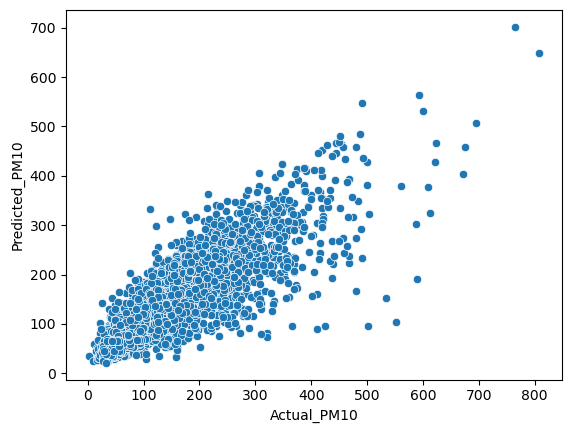

In [74]:
sns.scatterplot(x=pred_df4["Actual_PM10"],y=pred_df4["Predicted_PM10"])
plt.show()

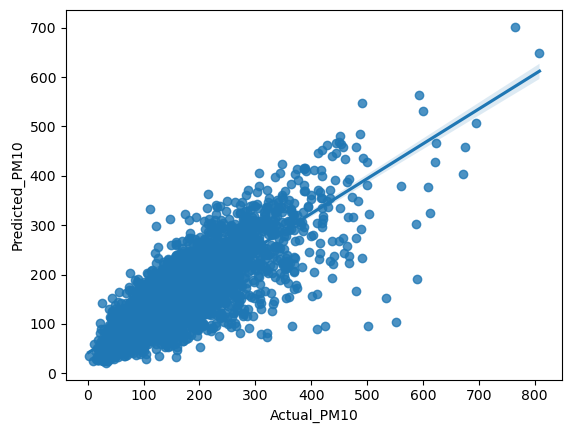

In [75]:
sns.regplot(x=pred_df4["Actual_PM10"],y=pred_df4["Predicted_PM10"])
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
rmse4=np.sqrt(mean_squared_error(pred_df4['Actual_PM10'],pred_df4['Predicted_PM10']))
print(rmse4)

47.17219287141347


# NO 2 - Reg

In [77]:
final_df_reg

PM2_5        PM10         NO2         RH        WS          WD
0       98.550000  156.890000   47.700000  81.790000  2.600000  226.990000
1       93.920000  141.840000   31.690000  92.900000  2.370000  285.440000
2       71.620000  150.170000   29.180000  94.310000  1.910000  273.560000
3       65.470000  179.270000   45.330000  79.540000  1.550000  247.090000
4      169.060000  393.600000  103.210000  67.890000  2.020000  104.340000
...           ...         ...         ...        ...       ...         ...
26267   35.110000   57.920000   19.082000  79.058000  1.870000  184.032000
26268   21.490000   35.460000   25.530000  73.206000  3.358000  170.802000
26269   21.770000   35.930000   27.450000  77.412000  2.286000  190.746000
26270   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765
26271   65.164654  140.370488   23.313237  64.357624  2.409814  194.269765

[26272 rows x 6 columns]

In [79]:
x3=final_df_reg.iloc[:,[0,1,3,4,5]]
print(x3)
y3=final_df_reg.iloc[:,2]
print(y3)

            PM2_5        PM10         RH        WS          WD
0       98.550000  156.890000  81.790000  2.600000  226.990000
1       93.920000  141.840000  92.900000  2.370000  285.440000
2       71.620000  150.170000  94.310000  1.910000  273.560000
3       65.470000  179.270000  79.540000  1.550000  247.090000
4      169.060000  393.600000  67.890000  2.020000  104.340000
...           ...         ...        ...       ...         ...
26267   35.110000   57.920000  79.058000  1.870000  184.032000
26268   21.490000   35.460000  73.206000  3.358000  170.802000
26269   21.770000   35.930000  77.412000  2.286000  190.746000
26270   65.164654  140.370488  64.357624  2.409814  194.269765
26271   65.164654  140.370488  64.357624  2.409814  194.269765

[26272 rows x 5 columns]
0         47.700000
1         31.690000
2         29.180000
3         45.330000
4        103.210000
            ...    
26267     19.082000
26268     25.530000
26269     27.450000
26270     23.313237
26271     23.31323

In [80]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,random_state=3,test_size=0.2)
x_train3.shape,y_train3.shape,x_test3.shape,y_test3.shape

((21017, 5), (21017,), (5255, 5), (5255,))

In [81]:
from sklearn.linear_model import LinearRegression
lm3=LinearRegression()
lm3.fit(x_train3,y_train3)
print (lm3.intercept_)
print (lm3.coef_)

7.910072593735833
[ 0.09464006  0.03715175  0.03277063 -0.11404568  0.01133247]


In [85]:
y_pred5=lm3.predict(x_test3)
pred_df5=pd.DataFrame()
pred_df5["Actual_NO2"]=y_test3
pred_df5["Predicted_NO2"]=y_pred5
pred_df5

Actual_NO2  Predicted_NO2
332         78.74      30.422737
4324        39.14      23.777681
13540       14.60      19.078052
9914        43.23      31.504476
23524        4.36      14.212653
...           ...            ...
10035       12.92      14.130557
2117        37.34      18.964646
23177       11.34      15.174138
7130        20.56      16.632962
10739       28.33      28.008577

[5255 rows x 2 columns]

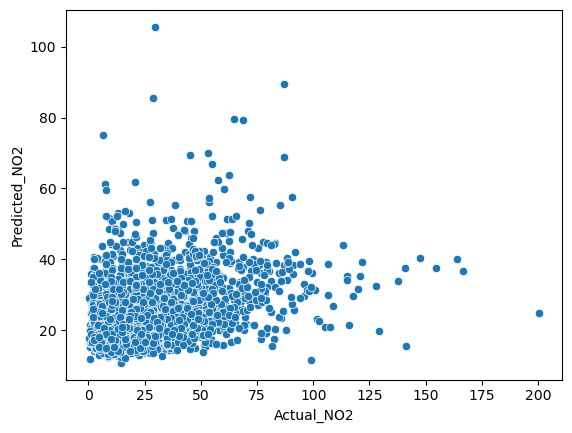

In [87]:
sns.scatterplot(x=pred_df5["Actual_NO2"],y=pred_df5["Predicted_NO2"])
plt.show()

In [88]:
lm3.score(x_train3,y_train3)

0.1639224830914211

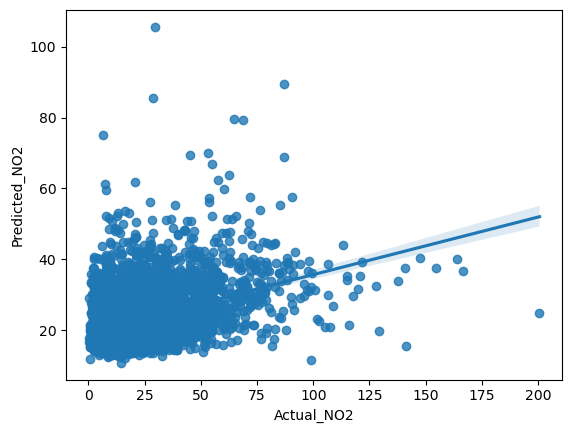

In [89]:
sns.regplot(x=pred_df5["Actual_NO2"],y=pred_df5["Predicted_NO2"])
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error
rmse3=np.sqrt(mean_squared_error(pred_df5['Actual_NO2'],pred_df5['Predicted_NO2']))
print(rmse3)

16.320730456763236


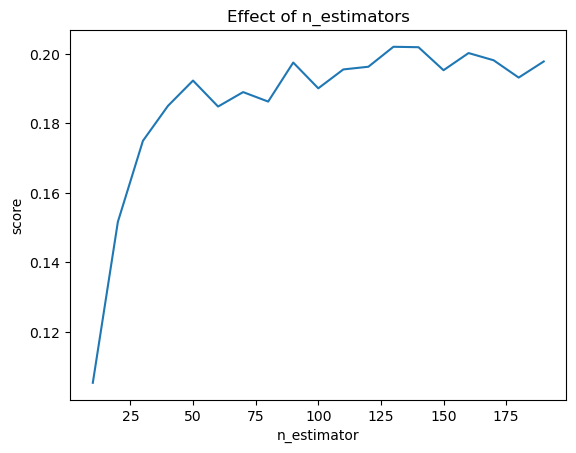

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train3, y_train3)
    scores.append(model.score(x_test3, y_test3))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [93]:
rf3=RandomForestRegressor(n_jobs=-1,n_estimators=135,random_state = 42)
rf3.fit(x_train3,y_train3)
rf3.score(x_train3,y_train3)

0.8919557765426385

In [94]:
y_pred6=rf3.predict(x_test3)
pred_df6=pd.DataFrame()
pred_df6["Actual_NO2"]=y_test3
pred_df6["Predicted_NO2"]=y_pred6
pred_df6

Actual_NO2  Predicted_NO2
332         78.74      28.524667
4324        39.14      15.962148
13540       14.60      20.955630
9914        43.23      32.572593
23524        4.36      12.008074
...           ...            ...
10035       12.92      14.495852
2117        37.34      21.165556
23177       11.34      23.230222
7130        20.56      17.502015
10739       28.33      20.126444

[5255 rows x 2 columns]

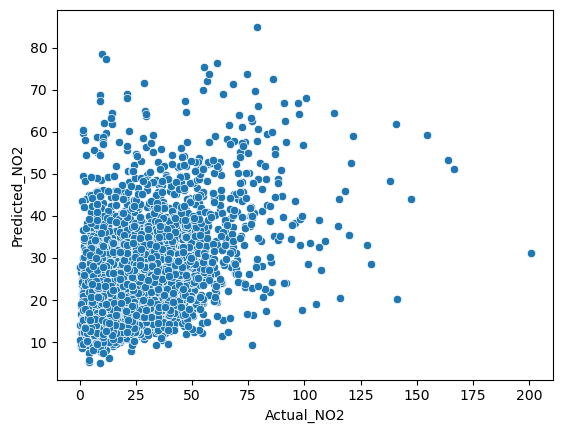

In [96]:
sns.scatterplot(x=pred_df6["Actual_NO2"],y=pred_df6["Predicted_NO2"])
plt.show()

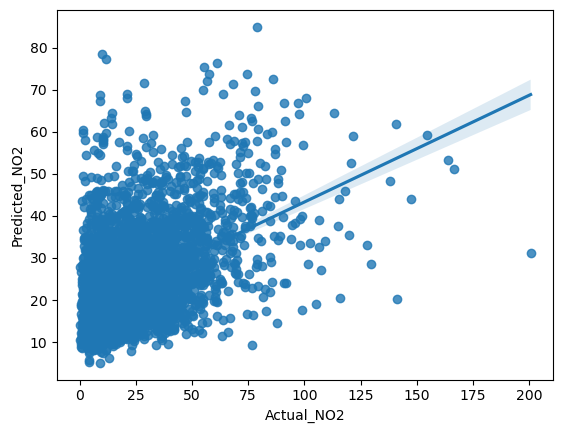

In [97]:
sns.regplot(x=pred_df6["Actual_NO2"],y=pred_df6["Predicted_NO2"])
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error
rmse6=np.sqrt(mean_squared_error(pred_df6['Actual_NO2'],pred_df6['Predicted_NO2']))
print(rmse6)

15.854599196721779
